In [52]:
import json
import numpy as np
import matplotlib.pyplot as plt
import math, random, copy
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl


%matplotlib inline

In [2]:
#x_mat = np.matrix(np.tile(np.random.randint(1000),(50,50)))
totalClust=10
#?np.zeros

x_mat = np.zeros((20001,31494))
with open('feat-obs.txt','r') as docfile:
    # skip 3 lines
    for i in range(3):
        next(docfile)
    for doc in docfile:        
        content = doc.split(',')
        x_mat[int(content[0])-1,int(content[1])-1] = int(content[2])
    
x_mat.shape

(20001, 31494)

In [6]:
x_mat

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [152]:
totalClust=15
# total clusters
j=totalClust
# total documents
i=x_mat.shape[0]
# total vocabularies
k=x_mat.shape[1]

# initialize pi_j matrix with same probability
pi_j = np.repeat(1/j,j)

# prepare words probability for each clusters and documents
p_jk = np.matrix(np.tile(1/k,(j,k)))
# prepare w_ij matrix initialize
w_ij = np.matrix(np.tile(0,(i,j)))

# init random for p_jk
sample = [np.random.randint(0,high=i) for x in range(j)]
p_jk = x_mat[sample,]

# small values to avoid log(0)
epsilon = 1e-7

p_jk = p_jk + epsilon
# normalize p_jk so the probability will be equal one
#p_jk = [p_jk[x,]/sum(p_jk[x,]) for x in range(j)]
p_jk = np.asarray([np.asarray(p_jk[x,]/p_jk[x,].sum()) for x in range(j)])
print(p_jk.shape)
p_jk = np.reshape(p_jk,(j,k))
# test normalize function
p_jk[1,].sum()

#np.asarray(p_jk[1,]/p_jk[1,].sum())
#np.apply_along_axis(lambda x: x,p_jk,0)

#?np.random.randint


(15, 31494)


0.99999999999999944

In [153]:
trace_Q = 100
old_Q = 0
treshold = 1e-4
while(trace_Q > treshold):
    sum_Qpart = 0
    print('ESTEP')
    for iTrace in range(i):
        w_ij_coll = []
        for jTrace in range(j):
            #print(x_mat[iTrace,].shape)
            #print(p_jk[jTrace,].shape)
            #print(x_mat[iTrace,].dot(np.log(p_jk[jTrace,])))
            w_ij_ex = x_mat[iTrace,].dot(np.log(p_jk[jTrace,])) + np.log(pi_j[jTrace])
            sum_Qpart = sum_Qpart + w_ij_ex
            #print(w_ij_ex.shape)
            w_ij_coll.append(w_ij_ex)
            w_ij[iTrace,jTrace] = w_ij_ex
        # normalize w_ij
        max_w_ij = max(w_ij_coll)
        w_ij[iTrace,] = w_ij[iTrace,] - max_w_ij - np.log(np.sum(np.exp(w_ij[iTrace,]-max_w_ij)))

    print('MSTEP')
    for jTrace in range(j):
        print(jTrace)
        sigmaXiWij = np.zeros(k)
        sigmaWij = 0
        sigmaXi1wij = 0
        for iTrace in range(i):
            sigmaXiWij = sigmaXiWij + x_mat[iTrace,] * np.exp(w_ij[iTrace,jTrace])
            sigmaXi1wij = sigmaXi1wij + (x_mat[iTrace,].dot(np.ones(k))) * np.exp(w_ij[iTrace,jTrace])
            sigmaWij = sigmaWij + np.exp(w_ij[iTrace,jTrace])
        p_jk[jTrace,] = sigmaXiWij / sigmaXi1wij
        pi_j[jTrace] = sigmaWij / k

    # normalize
    p_jk = p_jk + epsilon
    # normalize p_jk so the probability will be equal one
    #p_jk = [p_jk[x,]/sum(p_jk[x,]) for x in range(j)]
    p_jk = np.asarray([np.asarray(p_jk[x,]/p_jk[x,].sum()) for x in range(j)])
    print(p_jk.shape)
    p_jk = np.reshape(p_jk,(j,k))
    # test normalize function
    #p_jk[1,].sum()
    
    #calculate the Q change
    new_Q = (sum_Qpart*(w_ij)).sum()
    #print(new_Q)
    trace_Q = abs((old_Q-new_Q)/new_Q)
    old_Q = new_Q
    #print(trace_Q.shape)
    print(trace_Q)


ESTEP


KeyboardInterrupt: 

In [38]:
p_jk[1,].sum()

1.0

In [39]:
npvoc = np.array(vocabulary)

In [51]:
npvoc[np.argsort(-p_jk)]

array([['network', 'model', 'data', ..., 'flicker', 'fogel', 'zwislocki'],
       ['network', 'model', 'learning', ..., 'loess', 'lives', 'zwislocki'],
       ['network', 'neuron', 'function', ..., 'latent', 'lea', 'zwislocki'],
       ..., 
       ['learning', 'function', 'algorithm', ..., 'innate', 'injected',
        'zwislocki'],
       ['learning', 'rules', 'examples', ..., 'helsinki', 'hemisphere',
        'zwislocki'],
       ['cell', 'direction', 'model', ..., 'illus', 'ild', 'zwislocki']], 
      dtype='<U23')

<Container object of 30 artists>

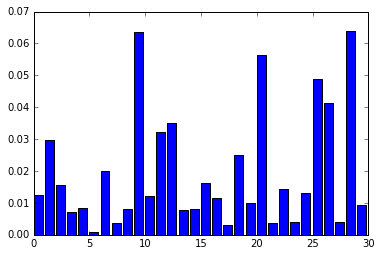

In [64]:
plt.bar(range(totalClust),pi_j)

In [154]:
#x_mat = np.matrix(np.tile(np.random.randint(1000),(50,50)))
totalClust=15
#?np.zeros

x_mat = np.zeros((20001,31494))
with open('feat-obs.txt','r') as docfile:
    # skip 3 lines
    for i in range(3):
        next(docfile)
    for doc in docfile:        
        content = doc.split(',')
        x_mat[int(content[0])-1,int(content[1])-1] = int(content[2])
    
x_mat.shape

(20001, 31494)

In [155]:
# calculate cluster center using kmeans for initialization
centroids, distortion = kmeans(x_mat,k_or_guess=totalClust, iter=5)
#normalizes ps ie mus
mus = np.zeros((totalClust, centroids.shape[1]))
for j in range(totalClust):
    mus[j] = (centroids[j]+.0001)/(np.sum(centroids[j])+centroids.shape[1]/10000)

In [156]:
# total clusters
j=totalClust
# total documents
i=x_mat.shape[0]
# total vocabularies
k=x_mat.shape[1]

# initialize pi_j matrix with same probability
pi_j = np.repeat(1/j,j)

# prepare words probability for each clusters and documents
p_jk = np.matrix(np.tile(1/k,(j,k)))
# prepare w_ij matrix initialize
w_ij = np.matrix(np.tile(0,(i,j)))

# init random for p_jk
"""
sample = [np.random.randint(0,high=i) for x in range(j)]
p_jk = x_mat[sample,]
"""
# initialize using kmeans
p_jk = mus

# small values to avoid log(0)
epsilon = 1e-7

p_jk = p_jk + epsilon
# normalize p_jk so the probability will be equal one
#p_jk = [p_jk[x,]/sum(p_jk[x,]) for x in range(j)]
p_jk = np.asarray([np.asarray(p_jk[x,]/p_jk[x,].sum()) for x in range(j)])
print(p_jk.shape)
p_jk = np.reshape(p_jk,(j,k))
# test normalize function
p_jk[1,].sum()

#np.asarray(p_jk[1,]/p_jk[1,].sum())
#np.apply_along_axis(lambda x: x,p_jk,0)

#?np.random.randint

(15, 31494)


1.0

In [157]:
trace_Q = 100
old_Q = 0
treshold = 1e-4
count = 0
max_iter = 20
while(trace_Q > treshold and count<max_iter):
    count+=1
    sum_Qpart = 0
    print('ESTEP')
    for iTrace in range(i):
        w_ij_coll = []
        for jTrace in range(j):
            #print(x_mat[iTrace,].shape)
            #print(p_jk[jTrace,].shape)
            #print(x_mat[iTrace,].dot(np.log(p_jk[jTrace,])))
            w_ij_ex = x_mat[iTrace,].dot(np.log(p_jk[jTrace,])) + np.log(pi_j[jTrace])
            sum_Qpart = sum_Qpart + w_ij_ex
            #print(w_ij_ex.shape)
            w_ij_coll.append(w_ij_ex)
            w_ij[iTrace,jTrace] = w_ij_ex
        # normalize w_ij
        max_w_ij = max(w_ij_coll)
        w_ij[iTrace,] = w_ij[iTrace,] - max_w_ij - np.log(np.sum(np.exp(w_ij[iTrace,]-max_w_ij)))

    print('MSTEP')
    for jTrace in range(j):
        #print(jTrace)
        sigmaXiWij = np.zeros(k)
        sigmaWij = 0
        sigmaXi1wij = 0
        for iTrace in range(i):
            sigmaXiWij = sigmaXiWij + x_mat[iTrace,] * np.exp(w_ij[iTrace,jTrace])
            sigmaXi1wij = sigmaXi1wij + (x_mat[iTrace,].dot(np.ones(k))) * np.exp(w_ij[iTrace,jTrace])
            sigmaWij = sigmaWij + np.exp(w_ij[iTrace,jTrace])
        p_jk[jTrace,] = sigmaXiWij / sigmaXi1wij
        pi_j[jTrace] = sigmaWij / k

    # normalize
    p_jk = p_jk + epsilon
    # normalize p_jk so the probability will be equal one
    #p_jk = [p_jk[x,]/sum(p_jk[x,]) for x in range(j)]
    p_jk = np.asarray([np.asarray(p_jk[x,]/p_jk[x,].sum()) for x in range(j)])
    #print(p_jk.shape)
    p_jk = np.reshape(p_jk,(j,k))
    # test normalize function
    #p_jk[1,].sum()
    
    #calculate the Q change
    new_Q = (sum_Qpart*(w_ij)).sum()
    #print(new_Q)
    trace_Q = abs((old_Q-new_Q)/new_Q)
    old_Q = new_Q
    #print(trace_Q.shape)
    print(trace_Q)

ESTEP
MSTEP
1.0
ESTEP
MSTEP
0.331896710601
ESTEP
MSTEP
0.0138953272681
ESTEP
MSTEP
0.000900901172858
ESTEP
MSTEP
0.000337840116263
ESTEP
MSTEP
8.98778915622e-05


<Container object of 15 artists>

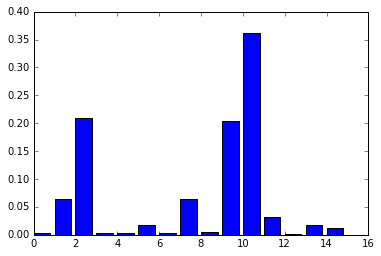

In [158]:
plt.bar(range(totalClust),pi_j/sum(pi_j))

In [3]:
vocabulary = []
with open('words-obs.txt','r') as vocfile:    
    for voc in vocfile:
        voc = voc.replace('\n','')
        vocabulary.append(voc)
npvoc = np.array(vocabulary)

In [864]:
npvoc[np.argsort(-p_jk)].shape
npvoc[np.argsort(-p_jk)][:,0:20]

#-np.sort(-p_jk)

array([['mars', 'jihad', 'lose', 'bureaucratic', 'para', 'world',
        'gtupdate', 'voice', 'newspaper', 'grace', 'atrocities', 'stir',
        'source', 'mean', 'prosecuted', 'spectre', 'symptom', 'olympic',
        'came', 'wishful'],
       ['know', '55', 'efficient', 'divisi', 'looking', 'karni', 'scourge',
        'su', 'declaro', 'new', 'campaigning', 'libertad', 'retorne',
        'imperio', 'especie', 'guarda', 'grasp', 'bored', 'certain',
        'ladrones'],
       ['commitment', 'applaud', 'king', 'fulfill', 'peace', 'laptop',
        'infared', 'using', 'tv', 'team', 'house', 'satisfying', 'rica',
        'aimed', 'little', 'barack', 'tarnishes', 'gone', 'idea', 'para'],
       ['bein', 'fails', 'political', 'diaz', 'kala', 'families', 'peace',
        'barack', 'house', 'grace', 'aimed', 'check', 'xc', 'publications',
        'ngo', 'ethics', 'rezko', 'rica', 'mercy', 'nice'],
       ['january', 'jiving', 'signs', 'silencing', 'water', 'peace',
        'mars', 'applaud'

In [149]:
import pickle

In [187]:
em_results = {}
em_results['pi_j'] = pi_j
em_results['p_init'] = mus
em_results['p_jk'] = p_jk
em_results['w_ij'] = w_ij
em_results['cluster'] = totalClust
#pickle.dump( em_results, open( "em_results_15b.p", "wb" ) )


In [98]:
np.sort(-p_jk)

array([[ -9.74136558e-03,  -9.58132917e-03,  -8.46137176e-03, ...,
         -9.96618970e-08,  -9.96618970e-08,  -9.96618970e-08],
       [ -3.45228588e-02,  -3.27734599e-02,  -2.33285546e-02, ...,
         -9.96618970e-08,  -9.96618970e-08,  -9.96618970e-08],
       [ -4.80845895e-02,  -3.49780309e-02,  -3.48804644e-02, ...,
         -9.96618970e-08,  -9.96618970e-08,  -9.96618970e-08],
       ..., 
       [ -5.05844318e-02,  -3.90146112e-02,  -3.14807745e-02, ...,
         -9.96618970e-08,  -9.96618970e-08,  -9.96618970e-08],
       [ -2.40751585e-02,  -1.63028954e-02,  -1.02367388e-02, ...,
         -9.96618970e-08,  -9.96618970e-08,  -9.96618970e-08],
       [ -6.37309710e-02,  -4.01065963e-02,  -3.35137475e-02, ...,
         -9.96618970e-08,  -9.96618970e-08,  -9.96618970e-08]])

In [99]:
import pandas as pd

In [104]:
ex_feature = pd.read_csv('ex-feature.txt',header=None,names=['doc','word','total'])

In [112]:
np.mean(ex_feature.groupby('doc')['total'].sum())

10.79320567456993

In [126]:
sum_dist = ex_feature.groupby('doc')['total'].sum()

In [127]:
sum_dist[sum_dist<100].std()

13.28447405993878

In [139]:
sum_dist[sum_dist<100].count()

4300938

(array([  3.68950100e+06,   4.28476000e+05,   1.22328000e+05,
          4.36620000e+04,   1.69710000e+04,   8.36100000e+03,
          4.31000000e+03,   2.18600000e+03,   1.21000000e+03,
          8.27000000e+02]),
 array([   1. ,   20.8,   40.6,   60.4,   80.2,  100. ,  119.8,  139.6,
         159.4,  179.2,  199. ]),
 <a list of 10 Patch objects>)

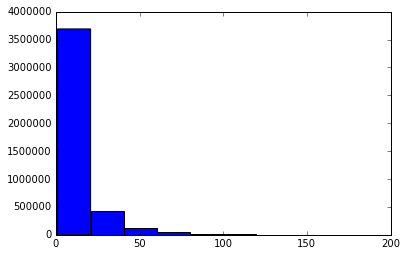

In [132]:
plt.hist(sum_dist[sum_dist<200].values)

In [188]:
npvoc.arg

In [190]:
p_jk.shape

(15, 31494)

In [219]:
p_jk[:,[101,10,100,12]].sum(axis=1)
test = p_jk[:,[1,10,1,12]].sum(axis=1)
max(test / test.sum())

0.19600750604320424

In [224]:
aha = [[123],[345],[565]]

array([[123, 345, 565]])

In [147]:
# count the accuracy of our baseline
with open('prediction-child-parents.20170330.txt','r') as preds:
    tp = 0
    tn = 0
    count = 0
    for row in preds:
        myPred = json.loads(row)
        tnode = myPred['target_node']
        for idx in myPred['alpha'].keys():
            alpha = myPred['alpha'][idx]
            if int(idx) != int(tnode):
                if alpha <= 1e-6:
                    tn+=1
                else:
                    tp+=1
                count+=1
                

In [148]:
error_rate = tn / count
accuracy = tp / count
print('Error Rate (False Negative): {}'.format(error_rate))
print('Accuracy (True Positive): {}'.format(accuracy))

Error Rate (False Negative): 0.3458978608794738
Accuracy (True Positive): 0.6541021391205263


In [149]:
# count the accuracy for improved model
import time
with open('prediction-child-parents-p.txt','r') as preds:
    newtp = 0
    newtn = 0
    newcount = 0
    for row in preds:
        myPred = json.loads(row)
        tnode = myPred['target_node']
        for idx in myPred['alpha'].keys():            
            alpha = myPred['alpha'][idx]
            p_value = [ x for x in alpha if x > 1e-6]
            #print(p_value)
            #time.sleep(3)
            if int(idx) != int(tnode):
                if len(alpha)==0 or len(p_value) == 0:
                    newtn+=1
                else:
                    newtp+=1
                newcount+=1

In [150]:
error_rate = newtn / newcount
accuracy = newtp / newcount
print('Error Rate (False Negative): {}'.format(error_rate))
print('Accuracy (True Positive): {}'.format(accuracy))

Error Rate (False Negative): 0.19911323991067673
Accuracy (True Positive): 0.8008867600893232


In [285]:
# TODO
# Provide interactive analysis for choosen observation nodes

In [7]:
# Load all data, nodes, edges, and cascades
# Nodes
nodes = []
nodeHash = {}
with open('nodes.txt','r') as nodesFile:
    for node in nodesFile:
        rownode = node.replace('\n','').split(',')
        nodes.append(rownode[1])
        #nodeHash[rownode[0]] = int(rownode[1])
        nodeHash[int(rownode[1])] = rownode[0]

In [8]:
# Edges
edges = {}
followes = {}
with open('edges.txt','r') as edgesFile:
    for edge in edgesFile:
        edgeJson = edge.replace('\n','').split(',')
        if int(edgeJson[0]) not in edges.keys():
            edges[int(edgeJson[0])] = []
        if int(edgeJson[1]) not in followes.keys():
            followes[int(edgeJson[1])] = []
        edges[int(edgeJson[0])].append(int(edgeJson[1]))
        followes[int(edgeJson[1])].append(int(edgeJson[0]))

In [9]:
# Cascades
cascades = {}
cascade_count = 0
nodeCascades = {}
cascade_checker = {}
cascade_probs = {}
with open('cascade-file-parent-probs.txt','r') as casFile:
    for casRead in casFile:
        # prepare cascade
        # load cascade from the file
        obsNode = json.loads(casRead)
        #print(obsNode)
        parent_node = obsNode['node']
        for obsCascades in obsNode['cascades']:
            if obsCascades['url'] not in cascade_checker:
                cascade_checker[obsCascades['url']] = 1
            else:
                continue
            cascade_id = cascade_count
            cascades[cascade_id] = {'probs': obsCascades['probs'],'cas': []}
            for obsCas in obsCascades['cas']:
                dst = int(obsCas['node'])
                at = float(obsCas['time'])/2505600
                cascades[cascade_id]['cas'].append((at, dst))                

                # append cascadeid to nodes
                if dst not in nodeCascades.keys():
                    nodeCascades[dst] = []
                nodeCascades[dst].append(cascade_id)
            # add new cascade id
            cascade_count+=1

In [10]:
# Define logSurvival and Hazard function
def logSurvival(t_i, t_j, alpha_ji):
    # survival function for the transmission
    #print('log alpha: {}'.format(alpha_ji))
    return -alpha_ji * (t_i - t_j)

def hazard(t_i, t_j, alpha_ji):
    # hazard function when one node succesfully infected
    #print('haz alpha: {}'.format(alpha_ji))
    #return alpha_ji
    return alpha_ji

In [11]:
nodeCasSort = sorted(list(nodeCascades.keys()))

In [12]:
import cvxpy as CVX
from collections import defaultdict
import time
import random

time_period = 1.0

def solveTargetNode(target_node,k_neighbor = 5):
    # we want to infer transmission rate between child
    # and their parents, whose parent giving faster transmission
    # rate than the others therefore we need to use
    # all the cascades that are pass through the parent edge
    # in our cascade observation

    # reconstruct the nodes id for convex optimization problem
    # we will use our nodes of interest following child and
    # and parent relationship while child is the target node
    convexNodes = {}
    convexNodesArr = []
    convexNodes[target_node] = 0
    convexNodesArr.append(target_node)
    convexNodesCount = 1

    # construct the cascade for following 
    #observationCascadesId = nodeCascades[target_node].copy()
    observationCascadesId = copy.copy(nodeCascades[target_node])

    #print(edges[str(target_node)])

    if target_node not in edges.keys():
        # target node not in the edges
        return -1

    # prepare neighbor derived from    
    derivedFrom = {}
    # check neighborhood cascade
    neighborArr = []
    for parent in edges[target_node]:
        if parent in nodeCascades:
            [observationCascadesId.append(x) for x in nodeCascades[parent]]
        # add the convex nodes
        convexNodes[parent] = convexNodesCount
        convexNodesArr.append(parent)
        convexNodesCount+=1
        # add 5 random neighbor from the parents
        nFollowers = len(followes[parent])
        k = k_neighbor
        k = k if nFollowers > k else nFollowers
        neighbors = random.sample(range(nFollowers),k)
        #print(followes[parent])
        #print(neighbors)        
        for neighbor in neighbors:
            myneighbor = followes[parent][neighbor]
            #print(myneighbor)
            if myneighbor not in convexNodes:
                convexNodes[myneighbor] = convexNodesCount
                convexNodesArr.append(myneighbor)
                neighborArr.append(myneighbor)
                convexNodesCount+=1

    #print(convexNodes)
    #time.sleep(1)
    
    # reconstruct the observation cascades for this node and their neighbor    
    observationCascades = {}
    for casid in observationCascadesId:
        if casid not in observationCascades:
            observationCascades[casid] = cascades[casid]
            # add neighbor (child) of parent from same cascade
            """
            parent = -1
            for val in cascades[casid]:
                # get parent
                if parent == -1:
                    parent = val[1]
                myneighbor = val[1]
                if myneighbor not in convexNodesArr:
                    convexNodes[val[1]] = convexNodesCount
                    convexNodesArr.append(myneighbor)
                    derivedFrom[myneighbor] = parent
                    convexNodesCount+=1
            """
    
    #print(len(observationCascades.keys()))
    #time.sleep(1)

    num_nodes = len(convexNodesArr)

    # prepare the observation matrix
    A = np.zeros((num_nodes, num_nodes), dtype=float)

    # This is one column of the alpha matrix
    Ai = CVX.Variable(num_nodes, name='A[:,{}]'.format(convexNodes[target_node]))

    constraints=[]
    # define constraints
    for j in range(num_nodes):
        if j == convexNodes[target_node]:
            constraints.append(Ai[j] == 0)
        else:
            constraints.append(Ai[j] >= 0)
            #constraints.append(Ai[j] >> 0)

    for num_node in range(num_nodes):
        print('{} of {}'.format(num_node+1,num_nodes))
        target_node_loc = convexNodesArr[num_node]
        bad_infection = 0
        expr = 0
        proceed = False
        for c_idx, citem in observationCascades.items():
        #for c_idx, c in observationCascades.items():
        #for nodecas in nodeCascades[target_node]:
        #for nodecas in observationCascades:
            c = citem['cas']        
            #c_idx = nodecas
            #c = cascades[c_idx]
            #print(myCount)
            #print(c)
            #myCount+=1

            infection_time_arr = [x[0] for x in c if x[1] == target_node_loc]
            #print('infection time: {}'.format(infection_time_arr))
            #time.sleep(1)

            #print('cascade: {}'.format(c))
            #print('total cascade: {}'.format(len(c)))
            assert len(infection_time_arr) <= 1

            # computing the survival function of
            # the node i given cascade from j
            # this is unlikely to happen except if we are interested in
            # relation with other cascades on the edges
            if len(infection_time_arr) == 0:
                # Node 'i' was not infected in this cascade

                for j in range(len(c)):
                    # check if the cascade transmission is in our observation nodes or not
                    if c[j][1] in convexNodes.keys():
                        alpha_ji = Ai[convexNodes[c[j][1]]]
                        #print('alpha_ji surv: {}'.format(alpha_ji))
                        t_j = c[j][0]
                        T = time_period
                        #print('log sur1: {}'.format(logSurvival(T, t_j, alpha_ji)))
                        expr += logSurvival(T, t_j, alpha_ji)
                        #print('log expr: {}\n'.format(expr))
                        #proceed=True

                # Instead of making so many parameter for uninteresting
                # cascade better to add counter for bad_infection
                # and multiply it with the survival function
                # in the end. Therefore we can save memory for
                # making a convex function

                """
                # because we are interested in parent and child relation only
                # then the logsurvival is the maximum ammount of the observation time
                T = time_period
                alpha_ji = Ai[target_node]
                expr+=logSurvival(T,0,alpha_ji)
                """

                # bad_infection+=1
            else:
                # Node 'i' was infected in this cascade
                infection_time = infection_time_arr[0]
                t_i = infection_time

                if c[0][0] != infection_time:
                    # build the logSurvival and hazard function for
                    # the infection
                    # as a result this function will build an expression
                    # that will be solved by convex problem            
                    log_sum = 0

                    # check if the infection from the observation nodes
                    # for child and parent relation
                    for j in range(len(c)):
                        if c[j][1] in convexNodes.keys():
                            t_j = c[j][0]
                            alpha_ji = Ai[convexNodes[c[j][1]]]
                            #print('alpha_ji haz: {}'.format(alpha_ji))

                            if t_j < t_i:
                                expr+=logSurvival(t_i,t_j,alpha_ji)
                                #print('log sur2: {}'.format(logSurvival(t_i,t_j,alpha_ji)))
                                log_sum+=hazard(t_i,t_j,alpha_ji)
                                proceed=True
                                #pass
                            #print('expr: {}'.format(expr))
                            #time.sleep(1)
                    expr += CVX.log(log_sum)                
                    #print('expr: {}'.format(expr))
                    #time.sleep(1)

                    # for parent child relation only
                    """
                    t_j = 0
                    alpha_ji = Ai[target_node]
                    expr+=logSurvival(t_i,0,alpha_ji)
                    log_sum+=hazard(t_i,0,alpha_ji)
                    expr += CVX.log(log_sum)
                    """

        # calculate bad infection for parent and child relation
        """
        T = time_period
        alpha_ji = Ai[target_node]                       
        expr += bad_infection * logSurvival(T,0,alpha_ji)
        """
        #print('expr: {}'.format(expr))
        #print(A)
        #time.sleep(2)
        tempA = np.zeros(num_nodes,dtype=float)
        try:
            if proceed:
                prob = CVX.Problem(CVX.Maximize(expr), constraints)
                #res = prob.solve(verbose=True,max_iters=500)
                res = prob.solve(verbose=False,max_iters=500)
                #if prob.status in [CVX.OPTIMAL, CVX.OPTIMAL_INACCURATE]:
                tempA = np.asarray(Ai.value).squeeze().tolist()
                #print(convexNodes[target_node_loc])
                A[:,num_node] = tempA
                #print(len(tempA))
                #Aone = {}                
                #for x in range(len(tempA)):            
                #    Aone[convexNodesArr[x]] = tempA[x]
                #print(A)
                #else:
                #    A[:, target_node] = -1
                #print('result: {}'.format(res))
            else:
                A[:,num_node] = 0
        except BaseException as e:
            print(e)
            tempA[:] = -1
            A[:,num_node] = tempA
    return({'mat': A,'target':target_node, 'parents': edges[target_node],'neighbors': neighborArr,'trans':convexNodesArr})

In [564]:
tnode = solveTargetNode(774,2)

1 of 89
2 of 89
3 of 89
4 of 89
5 of 89
Combined backtracking failed 90 0 0 0 sigma 0.00862514
Solver 'ECOS' failed. Try another solver.
6 of 89
Combined backtracking failed 90 0 0 0 sigma 0.0173491
Solver 'ECOS' failed. Try another solver.
7 of 89
8 of 89
9 of 89
10 of 89
Combined backtracking failed 90 0 0 0 sigma 0.0250953
Solver 'ECOS' failed. Try another solver.
11 of 89
Combined backtracking failed 90 0 0 0 sigma 0.0107384
Solver 'ECOS' failed. Try another solver.
12 of 89
Combined backtracking failed 90 0 0 0 sigma 0.0141066
Solver 'ECOS' failed. Try another solver.
13 of 89
Combined backtracking failed 90 0 0 0 sigma 0.0137143
Solver 'ECOS' failed. Try another solver.
14 of 89
15 of 89
Combined backtracking failed 90 0 0 0 sigma 0.0208622
Solver 'ECOS' failed. Try another solver.
16 of 89
17 of 89
Combined backtracking failed 90 0 0 0 sigma 0.0637075
Solver 'ECOS' failed. Try another solver.
18 of 89
19 of 89
20 of 89
21 of 89
Combined backtracking failed 90 0 0 0 sigma 0.07947

In [565]:
tnode['mat'].shape

(89, 89)

In [522]:
tnode

{'mat': array([[  0.00000000e+00,   3.04485768e-15,   3.04485768e-15, ...,
           3.13054138e-15,   3.10468550e-15,   6.34558406e-09],
        [  6.06100829e+00,   9.56288865e-01,   9.56288865e-01, ...,
           9.57135969e-01,   9.56960263e-01,   3.29299851e+05],
        [  6.06100829e+00,   9.56288865e-01,   9.56288865e-01, ...,
           9.57135969e-01,   9.56960263e-01,   3.29299851e+05],
        ..., 
        [  4.48051321e-08,   1.21602221e-10,   1.21602221e-10, ...,
           9.57135969e-01,   1.21343113e-10,   1.44916677e-02],
        [  4.39050623e-09,   1.41342793e-11,   1.41342793e-11, ...,
           1.42162250e-11,   9.56960263e-01,   1.87570706e-03],
        [ -1.03418968e-09,  -7.65346525e-13,  -7.65346525e-13, ...,
          -7.37994260e-13,  -7.38275042e-13,   3.29299851e+05]]),
 'neighbors': [32591,
  4348,
  33626,
  43451,
  32034,
  23470,
  23795,
  12498,
  4727,
  39309,
  1241,
  36055,
  36231,
  15709,
  42845,
  34058,
  32228,
  4782,
  29361,
  220

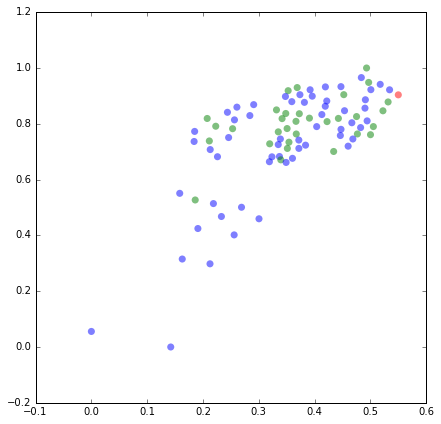

In [523]:
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D

dist_mat = tnode['mat']
dist_mat = np.log(1/np.where(dist_mat<1e-6, 1e-6, dist_mat))
#dist_mat = 1/np.where(dist_mat<1e-6, 1e-6, dist_mat)
#dist_mat = np.where(dist_mat<1e-6, 1e-6, dist_mat)

#pos = pCoordinate(dist_mat)
#print(pos)

G = nx.from_numpy_matrix(dist_mat) 
pos=nx.spring_layout(G,dim=2,k=0.3)
#print(pos)

trans = tnode['trans']
colors = np.tile('',len(trans))
for i in range(len(trans)):
    tran = trans[i]
    if tran == tnode['target']:
        colors[i]='red'
    if tran in tnode['parents']:
        colors[i]='green'
    if tran in tnode['neighbors']:
        colors[i]='blue'

fig = plt.figure(figsize=(7, 7))
#ax = fig.add_subplot(111, projection='3d')
for k, p in pos.items():
    plt.scatter(p[0], p[1], marker='o', c=colors[k], s=50,alpha=0.5, edgecolor='None')
    #ax.scatter(p[0], p[1], p[2], c=colors[k], marker='o')
#lgd = plt.legend(markers, labels, numpoints=1, bbox_to_anchor=(1.17, 0.5))
#plt.tight_layout()
#plt.axis('equal')
#pt.show()


84.9852538013


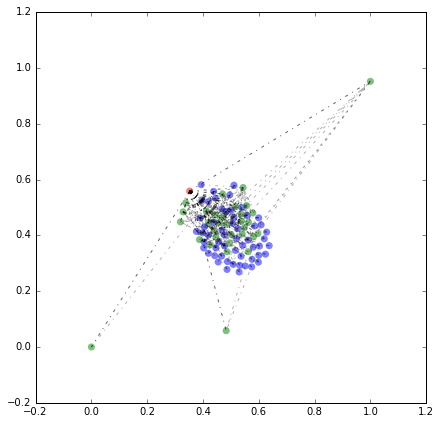

In [566]:
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D
from mpld3 import plugins
import mpld3

dist_mat = tnode['mat']
max_val = np.max(dist_mat)
print(max_val) 
dist_mat = np.log(max_val/np.where(dist_mat<1e-6, 1e-6, dist_mat))
#dist_mat = 1/np.where(dist_mat<1e-6, 1e-6, dist_mat)
#dist_mat = np.where(dist_mat<1e-6, 1e-6, dist_mat)

#pos = pCoordinate(dist_mat)
#print(pos)

G = nx.from_numpy_matrix(dist_mat) 
pos=nx.spring_layout(G,dim=2,k=0.4)
#print(pos)

trans = tnode['trans']
colors = np.tile('',len(trans))
parents = []
neighbors = []
target = 0
for i in range(len(trans)):
    tran = trans[i]
    if tran == tnode['target']:
        colors[i]='red'
        target = i
    if tran in tnode['parents']:
        colors[i]='green'
        parents.append(i)
    if tran in tnode['neighbors']:
        colors[i]='blue'
        neighbors.append(i)

        
        
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
#ax = fig.add_subplot(111, projection='3d')

# draw the lines from parents to target
for parent in parents:
    ax.plot([pos[target][0],pos[parent][0]],[pos[target][1],pos[parent][1]],'-.',c='black',alpha=0.6)

# draw the lines from the neighbors to all parent
for neighbor in neighbors:
    act_neighbor = trans[neighbor]
    # get all the parent
    myParents = edges[act_neighbor]
    for myParent in myParents:
        if myParent in trans:
            pIndex = trans.index(myParent)
            ax.plot([pos[neighbor][0],pos[pIndex][0]],[pos[neighbor][1],pos[pIndex][1]],'-.',c='black',alpha=0.3)

    
for k, p in pos.items():
    scatter = ax.scatter(p[0], p[1], marker='o', c=colors[k], s=50,alpha=0.5, edgecolor='None')
    #ax.scatter(p[0], p[1], p[2], c=colors[k], marker='o')
#lgd = plt.legend(markers, labels, numpoints=1, bbox_to_anchor=(1.17, 0.5))
#plt.tight_layout()
#plt.axis('equal')
#pt.show()
tooltip = plugins.PointHTMLTooltip(scatter, ['aha','oho'],
                                   voffset=10, hoffset=10)
plugins.connect(fig, tooltip)
#mpld3.display()
mpld3.enable_notebook()


In [13]:
import cvxpy as CVX
from collections import defaultdict
import time
import random

time_period = 1.0

def solveTargetNodeWithProb(target_node,k_neighbor = 5):
    # we want to infer transmission rate between child
    # and their parents, whose parent giving faster transmission
    # rate than the others therefore we need to use
    # all the cascades that are pass through the parent edge
    # in our cascade observation

    # reconstruct the nodes id for convex optimization problem
    # we will use our nodes of interest following child and
    # and parent relationship while child is the target node
    convexNodes = {}
    convexNodesArr = []
    convexNodes[target_node] = 0
    convexNodesArr.append(target_node)
    convexNodesCount = 1

    # construct the cascade for following 
    #observationCascadesId = nodeCascades[target_node].copy()
    observationCascadesId = copy.copy(nodeCascades[target_node])

    #print(edges[str(target_node)])

    if target_node not in edges.keys():
        # target node not in the edges
        return -1

    # prepare neighbor derived from    
    derivedFrom = {}
    # check neighborhood cascade
    neighborArr = []
    for parent in edges[target_node]:
        if parent in nodeCascades:
            [observationCascadesId.append(x) for x in nodeCascades[parent]]
        # add the convex nodes
        convexNodes[parent] = convexNodesCount
        convexNodesArr.append(parent)
        convexNodesCount+=1
        # add 5 random neighbor from the parents
        nFollowers = len(followes[parent])
        k = k_neighbor
        k = k if nFollowers > k else nFollowers
        neighbors = random.sample(range(nFollowers),k)
        #print(followes[parent])
        #print(neighbors)        
        for neighbor in neighbors:
            myneighbor = followes[parent][neighbor]
            #print(myneighbor)
            if myneighbor not in convexNodes:
                convexNodes[myneighbor] = convexNodesCount
                convexNodesArr.append(myneighbor)
                neighborArr.append(myneighbor)
                convexNodesCount+=1

    #print(convexNodes)
    #time.sleep(1)
    
    # reconstruct the observation cascades for this node and their neighbor    
    observationCascades = {}
    for casid in observationCascadesId:
        if casid not in observationCascades:
            observationCascades[casid] = cascades[casid]
            # add neighbor (child) of parent from same cascade
    
    #print(len(observationCascades.keys()))
    #time.sleep(1)

    num_nodes = len(convexNodesArr)

    # prepare the observation matrix
    A = np.zeros((num_nodes, num_nodes, 15), dtype=float)

    for num_node in range(num_nodes):
        # This is one column of the alpha matrix
        Ai = [CVX.Variable(num_nodes, name='A[:,{}]'.format(convexNodes[target_node])) for i in range(15)]
        constraints=[]
        # define constraints
        for j in range(num_nodes):
            if j == num_node:
                for i in range(15):
                    constraints.append(Ai[i][j] == 0)
            else:
                for i in range(15):
                    constraints.append(Ai[i][j] >= 0)
                #constraints.append(Ai[j] >> 0)
            
        print('{} of {}'.format(num_node+1,num_nodes))
        target_node_loc = convexNodesArr[num_node]
        bad_infection = 0
        expr = 0
        proceed = False
        
        # prepare expression array
        exprArr = [0 for i in range(15)]
        
        #for c_idx, c in observationCascades.items():
        #for nodecas in nodeCascades[target_node]:
        #for nodecas in observationCascades:
        for c_idx, citem in observationCascades.items():
            # normalize probability
            cprob = np.array(citem['probs'])
            cprob = cprob/cprob.sum()
            c = citem['cas']
        
            #myCount+=1

            infection_time_arr = [x[0] for x in c if x[1] == target_node_loc]
            #print('infection time: {}'.format(infection_time_arr))
            #time.sleep(1)

            #print('cascade: {}'.format(c))
            #print('total cascade: {}'.format(len(c)))
            assert len(infection_time_arr) <= 1

            # computing the survival function of
            # the node i given cascade from j
            # this is unlikely to happen except if we are interested in
            # relation with other cascades on the edges
            if len(infection_time_arr) == 0:
                # Node 'i' was not infected in this cascade

                for j in range(len(c)):
                    # check if the cascade transmission is in our observation nodes or not
                    if c[j][1] in convexNodes.keys():
                        #print('alpha_ji surv: {}'.format(alpha_ji))
                        t_j = c[j][0]
                        T = time_period
                        #print('log sur1: {}'.format(logSurvival(T, t_j, alpha_ji)))
                        for i in range(len(cprob)):                        
                            alpha_ji = Ai[i][convexNodes[c[j][1]]]    
                            exprArr[i] += logSurvival(T, t_j, alpha_ji * cprob[i])
                            #exprArr[i] += logSurvival(T, t_j, alpha_ji)
                        #print('log expr: {}\n'.format(expr))
                        #proceed=True

                # Instead of making so many parameter for uninteresting
                # cascade better to add counter for bad_infection
                # and multiply it with the survival function
                # in the end. Therefore we can save memory for
                # making a convex function

                """
                # because we are interested in parent and child relation only
                # then the logsurvival is the maximum ammount of the observation time
                T = time_period
                alpha_ji = Ai[target_node]
                expr+=logSurvival(T,0,alpha_ji)
                """

                # bad_infection+=1
            else:
                # Node 'i' was infected in this cascade
                infection_time = infection_time_arr[0]
                t_i = infection_time

                if c[0][0] != infection_time:
                    # build the logSurvival and hazard function for
                    # the infection
                    # as a result this function will build an expression
                    # that will be solved by convex problem            
                    #log_sum = 0
                    log_sum = [0 for x in range(15)]

                    # check if the infection from the observation nodes
                    # for child and parent relation
                    for j in range(len(c)):
                        if c[j][1] in convexNodes.keys():
                            t_j = c[j][0]
                            #print('alpha_ji haz: {}'.format(alpha_ji))

                            if t_j < t_i:
                                for i in range(len(cprob)):                                
                                    alpha_ji = Ai[i][convexNodes[c[j][1]]]
                                    exprArr[i]+=logSurvival(t_i,t_j,alpha_ji * cprob[i])
                                    #exprArr[i]+=logSurvival(t_i,t_j,alpha_ji)
                                    #print('log sur2: {}'.format(logSurvival(t_i,t_j,alpha_ji)))
                                    log_sum[i]+=hazard(t_i,t_j,alpha_ji * cprob[i])
                                proceed=True
                                #pass
                            #print('expr: {}'.format(expr))
                            #time.sleep(1)
                    for i in range(len(cprob)):
                        exprArr[i] += CVX.log(log_sum[i])
             
                    #print('expr: {}'.format(expr))
                    #time.sleep(1)

                    # for parent child relation only
                    """
                    t_j = 0
                    alpha_ji = Ai[target_node]
                    expr+=logSurvival(t_i,0,alpha_ji)
                    log_sum+=hazard(t_i,0,alpha_ji)
                    expr += CVX.log(log_sum)
                    """

        # calculate bad infection for parent and child relation
        """
        T = time_period
        alpha_ji = Ai[target_node]                       
        expr += bad_infection * logSurvival(T,0,alpha_ji)
        """
        #print('expr: {}'.format(expr))
        #print(A)
        #time.sleep(2)
        tempA = np.zeros(num_nodes,dtype=float)
        Aarray = np.zeros((num_nodes,len(cprob)))
        for i in range(len(cprob)):
            try:
                if proceed:
                #print(exprArr[i])
                #time.sleep(10)
                    prob = CVX.Problem(CVX.Maximize(exprArr[i]), constraints)
                    res = prob.solve(verbose=False,max_iters=500)
                    #print(convexNodes[target_node_loc])
                    if prob.status in [CVX.OPTIMAL, CVX.OPTIMAL_INACCURATE]:
                        Aarray[:,i] = np.asarray(Ai[i].value).squeeze()
                    else:
                        Aarray[:,i] = -1
                else:
                    Aarray[:,i] = 0
            except BaseException as e:
                print(e)
                Aarray[:,i] = -1
        #print(Aarray)
        A[:,num_node] = Aarray
#        print(A[:,num_node])
    return({'mat': A,'target':target_node, 'parents': edges[target_node],'neighbors': neighborArr,'trans':convexNodesArr})

In [14]:
import cvxpy as CVX
from collections import defaultdict
import time
import random
import multiprocessing as mp

time_period = 1.0


def solveParallel(exprArr,Ai,constraints,i,proceed,num_nodes,output):
    #print(exprArr)
    resArray = np.zeros(num_nodes)
    try:
        if proceed:
            #print('expr {}: {}'.format(i,exprArr))
            prob = CVX.Problem(CVX.Maximize(exprArr), constraints)
            res = prob.solve(verbose=False,max_iters=500)
            #print(convexNodes[target_node_loc])
            if prob.status in [CVX.OPTIMAL, CVX.OPTIMAL_INACCURATE]:
                resArray = np.asarray(Ai.value).squeeze()
            else:
                resArray[:] = -1
        else:
            resArray[:] = 0
    except BaseException as e:
        print(e)
        resArray[:] = -1
    output.put((i,resArray))

def solveTargetNodeWithProbM(target_node,k_neighbor = 5):
    # we want to infer transmission rate between child
    # and their parents, whose parent giving faster transmission
    # rate than the others therefore we need to use
    # all the cascades that are pass through the parent edge
    # in our cascade observation

    # reconstruct the nodes id for convex optimization problem
    # we will use our nodes of interest following child and
    # and parent relationship while child is the target node
    convexNodes = {}
    convexNodesArr = []
    convexNodes[target_node] = 0
    convexNodesArr.append(target_node)
    convexNodesCount = 1

    # construct the cascade for following 
    #observationCascadesId = nodeCascades[target_node].copy()
    observationCascadesId = copy.copy(nodeCascades[target_node])

    #print(edges[str(target_node)])

    if target_node not in edges.keys():
        # target node not in the edges
        return -1

    # prepare neighbor derived from    
    derivedFrom = {}
    # check neighborhood cascade
    neighborArr = []
    for parent in edges[target_node]:
        #if parent in nodeCascades:
        #    [observationCascadesId.append(x) for x in nodeCascades[parent]]
        # add the convex nodes
        convexNodes[parent] = convexNodesCount
        convexNodesArr.append(parent)
        convexNodesCount+=1
        # add 5 random neighbor from the parents
        nFollowers = len(followes[parent])
        k = k_neighbor
        k = k if nFollowers > k else nFollowers
        neighbors = random.sample(range(nFollowers),k)
        #print(followes[parent])
        #print(neighbors)        
        for neighbor in neighbors:
            myneighbor = followes[parent][neighbor]
            #print(myneighbor)
            if myneighbor not in convexNodes:
                convexNodes[myneighbor] = convexNodesCount
                convexNodesArr.append(myneighbor)
                neighborArr.append(myneighbor)
                if myneighbor in nodeCascades:
                    [observationCascadesId.append(x) for x in nodeCascades[myneighbor]]
                else:
                    print('neighbor {} not found in cascade'.format(myneighbor))
                convexNodesCount+=1

    #print(convexNodes)
    #time.sleep(1)
    
    # reconstruct the observation cascades for this node and their neighbor    
    observationCascades = {}
    for casid in observationCascadesId:
        if casid not in observationCascades:
            observationCascades[casid] = cascades[casid]
            # add neighbor (child) of parent from same cascade
    
    #print(len(observationCascades.keys()))
    #time.sleep(1)

    num_nodes = len(convexNodesArr)

    # prepare the observation matrix
    A = np.zeros((num_nodes, num_nodes, 15), dtype=float)

    for num_node in range(num_nodes):
        # This is one column of the alpha matrix
        #Ai = [CVX.Variable(num_nodes, name='A[:,{}]'.format(convexNodes[target_node])) for i in range(15)]
        Ai = CVX.Variable(num_nodes, name='A[:,{}]'.format(convexNodes[target_node])) 
        constraints=[]
        # define constraints
        for j in range(num_nodes):
            if j == num_node:
                constraints.append(Ai[j] == 0)
            else:
                constraints.append(Ai[j] >= 0)
        """
        for i in range(15):
            consChild = []
            for j in range(num_nodes):
                if j == num_node:
                    consChild.append(Ai[i][j] == 0)
                else:
                    consChild.append(Ai[i][j] >= 0)
                constraints.append(consChild)
        """
            
        print('{} of {}'.format(num_node+1,num_nodes))
        target_node_loc = convexNodesArr[num_node]
        bad_infection = 0
        expr = 0
        proceed = False
        
        # prepare expression array
        exprArr = [0 for i in range(15)]
        
        #for c_idx, c in observationCascades.items():
        #for nodecas in nodeCascades[target_node]:
        #for nodecas in observationCascades:
        for c_idx, citem in observationCascades.items():
            # normalize probability
            cprob = np.array(citem['probs'])
            cprob = cprob/cprob.sum()
            c = citem['cas']
        
            #myCount+=1

            infection_time_arr = [x[0] for x in c if x[1] == target_node_loc]
            #print('infection time: {}'.format(infection_time_arr))
            #time.sleep(1)

            #print('cascade: {}'.format(c))
            #print('total cascade: {}'.format(len(c)))
            assert len(infection_time_arr) <= 1
            
            proceedLog = False

            # computing the survival function of
            # the node i given cascade from j
            # this is unlikely to happen except if we are interested in
            # relation with other cascades on the edges
            if len(infection_time_arr) == 0:
                # Node 'i' was not infected in this cascade

                for j in range(len(c)):
                    # check if the cascade transmission is in our observation nodes or not
                    if c[j][1] in convexNodes.keys():
                        #print('alpha_ji surv: {}'.format(alpha_ji))
                        t_j = c[j][0]
                        T = time_period
                        #print('log sur1: {}'.format(logSurvival(T, t_j, alpha_ji)))
                        alpha_ji = Ai[convexNodes[c[j][1]]]
                        for i in range(len(cprob)):                        
                            #alpha_ji = Ai[i][convexNodes[c[j][1]]]
                            exprArr[i] += logSurvival(T, t_j, alpha_ji * cprob[i])
                            #exprArr[i] += logSurvival(T, t_j, alpha_ji)
                        #print('log expr: {}\n'.format(expr))
                        #proceed=True

                # Instead of making so many parameter for uninteresting
                # cascade better to add counter for bad_infection
                # and multiply it with the survival function
                # in the end. Therefore we can save memory for
                # making a convex function

                """
                # because we are interested in parent and child relation only
                # then the logsurvival is the maximum ammount of the observation time
                T = time_period
                alpha_ji = Ai[target_node]
                expr+=logSurvival(T,0,alpha_ji)
                """

                # bad_infection+=1
            else:
                # Node 'i' was infected in this cascade
                infection_time = infection_time_arr[0]
                t_i = infection_time

                if c[0][0] != infection_time:
                    # build the logSurvival and hazard function for
                    # the infection
                    # as a result this function will build an expression
                    # that will be solved by convex problem            
                    #log_sum = 0
                    log_sum = [0 for x in range(15)]

                    # check if the infection from the observation nodes
                    # for child and parent relation
                    for j in range(len(c)):
                        if c[j][1] in convexNodes.keys():
                            t_j = c[j][0]
                            #print('alpha_ji haz: {}'.format(alpha_ji))
                            alpha_ji = Ai[convexNodes[c[j][1]]]
                            if t_j < t_i:
                                for i in range(len(cprob)):                                
                                    #alpha_ji = Ai[i][convexNodes[c[j][1]]]
                                    exprArr[i]+=logSurvival(t_i,t_j,alpha_ji * cprob[i])
                                    #exprArr[i]+=logSurvival(t_i,t_j,alpha_ji)
                                    #print('log sur2: {}'.format(logSurvival(t_i,t_j,alpha_ji)))
                                    log_sum[i]+=hazard(t_i,t_j,alpha_ji * cprob[i])
                                    #print('from cas: {}'.format(log_sum[i]))
                                    #time.sleep(3)
                                proceed=True
                                proceedLog=True
                                #pass
                            #print('expr: {}'.format(expr))
                            #time.sleep(1)
                    
                    if proceedLog:
                        for i in range(len(cprob)):
                            #print('from expr: {}'.format(log_sum[i]))
                            exprArr[i] += CVX.log(log_sum[i])
                            #print(exprArr[i])
                            #time.sleep(1)
             
                    #print('expr: {}'.format(expr))
                    #time.sleep(1)

                    # for parent child relation only
                    """
                    t_j = 0
                    alpha_ji = Ai[target_node]
                    expr+=logSurvival(t_i,0,alpha_ji)
                    log_sum+=hazard(t_i,0,alpha_ji)
                    expr += CVX.log(log_sum)
                    """

        # calculate bad infection for parent and child relation
        """
        T = time_period
        alpha_ji = Ai[target_node]                       
        expr += bad_infection * logSurvival(T,0,alpha_ji)
        """
        #print('expr: {}'.format(expr))
        #print(A)
        #time.sleep(2)
        tempA = np.zeros(num_nodes,dtype=float)
        Aarray = np.zeros((num_nodes,len(cprob)))
                    
        output = mp.Queue()

        argArr = []
        for i in range(15):
            argArr.append((exprArr[i],Ai,constraints,i))

        # Setup a list of processes that we want to run
        processes = [mp.Process(target=solveParallel, args=(x[0], x[1], x[2],x[3],proceed,num_nodes,output)) for x in argArr]

        # Run processes
        for p in processes:
            p.start()

        # Exit the completed processes
        for p in processes:
            p.join()

        # Get process results from the output queue
        results = [output.get() for p in processes]

        results.sort()
        results = [r[1] for r in results]
        Aarray = np.array(results)
        #print(Aarray)
        #print(Aarray.shape)        
        
        """
        for i in range(len(cprob)):
            try:
                if proceed:
                #print(exprArr[i])
                #time.sleep(10)
                    prob = CVX.Problem(CVX.Maximize(exprArr[i]), constraints)
                    res = prob.solve(verbose=False,max_iters=500)
                    #print(convexNodes[target_node_loc])
                    if prob.status in [CVX.OPTIMAL, CVX.OPTIMAL_INACCURATE]:
                        Aarray[:,i] = np.asarray(Ai[i].value).squeeze()
                    else:
                        Aarray[:,i] = -1
                else:
                    Aarray[:,i] = 0
            except BaseException as e:
                print(e)
                Aarray[:,i] = -1
        """
        #print(Aarray)
        A[:,num_node] = Aarray.T
#        print(A[:,num_node])
    return({'mat': A,'target':target_node, 'parents': edges[target_node],'neighbors': neighborArr,'trans':convexNodesArr})

In [77]:
tnodep = solveTargetNodeWithProbM(774,2)

neighbor 9386 not found in cascade
neighbor 20030 not found in cascade
neighbor 1401 not found in cascade
neighbor 14157 not found in cascade
1 of 89
Combined backtracking failed 86 0 2 2 sigma 0.214248
Solver 'ECOS' failed. Try another solver.
Combined backtracking failed 90 0 0 0 sigma 0.84264
Combined backtracking failed 87 0 0 3 sigma 0.0874882
Combined backtracking failed 89 0 0 1 sigma 0.173423
Combined backtracking failed 89 0 0 1 sigma 0.0125123
Combined backtracking failed 87 0 0 3 sigma 0.0720802
Combined backtracking failed 87 0 0 3 sigma 0.359905
Solver 'ECOS' failed. Try another solver.
Solver 'ECOS' failed. Try another solver.
Solver 'ECOS' failed. Try another solver.
Solver 'ECOS' failed. Try another solver.
Solver 'ECOS' failed. Try another solver.
Combined backtracking failed 88 0 0 2 sigma 0.354554
Solver 'ECOS' failed. Try another solver.
Combined backtracking failed 90 0 0 0 sigma 0.845176
Combined backtracking failed 90 0 0 0 sigma 0.872786
Combined backtracking fa

In [78]:
tnodep2= solveTargetNodeWithProbM(91,2)

neighbor 5700 not found in cascade
neighbor 17284 not found in cascade
neighbor 19694 not found in cascade
neighbor 9058 not found in cascade
neighbor 34772 not found in cascade
neighbor 4334 not found in cascade
neighbor 3796 not found in cascade
neighbor 8061 not found in cascade
neighbor 30315 not found in cascade
neighbor 22744 not found in cascade
1 of 53
Combined backtracking failed 90 0 0 0 sigma 0.661416
Combined backtracking failed 88 0 2 0 sigma 0.308945
2 of 53
3 of 53
4 of 53
Combined backtracking failed 88 0 1 1 sigma 0.402302
Solver 'ECOS' failed. Try another solver.
Combined backtracking failed 86 0 0 4 sigma 0.038939
Combined backtracking failed 87 0 0 3 sigma 0.0456474
Combined backtracking failed 88 0 0 2 sigma 0.222612
Solver 'ECOS' failed. Try another solver.
Combined backtracking failed 87 0 0 3 sigma 0.0837885
Combined backtracking failed 89 0 0 1 sigma 0.0384623
Solver 'ECOS' failed. Try another solver.
Solver 'ECOS' failed. Try another solver.
Solver 'ECOS' fail

In [79]:
tnodep3= solveTargetNodeWithProbM(33,2)

1 of 7
2 of 7
Combined backtracking failed 89 1 0 0 sigma 0.221287
3 of 7
4 of 7
5 of 7
Combined backtracking failed 89 1 0 0 sigma 0.260443
Combined backtracking failed 89 0 1 0 sigma 0.0575288
Combined backtracking failed 90 0 0 0 sigma 0.17066
Combined backtracking failed 90 0 0 0 sigma 0.134943
Combined backtracking failed 90 0 0 0 sigma 1
6 of 7
7 of 7


In [80]:
tnodep4= solveTargetNodeWithProbM(125,2)

neighbor 20854 not found in cascade
1 of 14
Combined backtracking failed 90 0 0 0 sigma 0.32118
Combined backtracking failed 90 0 0 0 sigma 0.0713625
Combined backtracking failed 90 0 0 0 sigma 0.314291
Combined backtracking failed 88 2 0 0 sigma 0.416769
Combined backtracking failed 90 0 0 0 sigma 0.130238
Combined backtracking failed 90 0 0 0 sigma 0.356909
2 of 14
3 of 14
4 of 14
Combined backtracking failed 89 1 0 0 sigma 0.106666
Combined backtracking failed 90 0 0 0 sigma 0.409105
Combined backtracking failed 90 0 0 0 sigma 0.0534497
5 of 14
6 of 14
Combined backtracking failed 90 0 0 0 sigma 0.302558
7 of 14
Combined backtracking failed 90 0 0 0 sigma 0.050951
Combined backtracking failed 90 0 0 0 sigma 0.355973
Combined backtracking failed 89 0 0 1 sigma 0.26587
Combined backtracking failed 90 0 0 0 sigma 1
8 of 14
9 of 14
10 of 14
11 of 14
12 of 14
13 of 14
14 of 14


In [81]:
tnodep5= solveTargetNodeWithProbM(268,2)

neighbor 317 not found in cascade
neighbor 10294 not found in cascade
neighbor 3052 not found in cascade
neighbor 12001 not found in cascade
1 of 67
Combined backtracking failed 90 0 0 0 sigma 0.713697
Combined backtracking failed 90 0 0 0 sigma 0.71493
Combined backtracking failed 88 0 2 0 sigma 0.136781
Combined backtracking failed 90 0 0 0 sigma 0.768853
Combined backtracking failed 90 0 0 0 sigma 0.770964
Combined backtracking failed 90 0 0 0 sigma 0.650139
Combined backtracking failed 90 0 0 0 sigma 0.658033
Combined backtracking failed 90 0 0 0 sigma 0.626812
Combined backtracking failed 90 0 0 0 sigma 0.581369
Combined backtracking failed 90 0 0 0 sigma 0.717119
Combined backtracking failed 89 0 0 1 sigma 0.128017
Combined backtracking failed 88 0 1 1 sigma 0.220815
Combined backtracking failed 90 0 0 0 sigma 0.657229
Combined backtracking failed 90 0 0 0 sigma 0.770326
2 of 67
3 of 67
4 of 67
Combined backtracking failed 88 0 1 1 sigma 0.145249
Combined backtracking failed 90 0

In [15]:
def pCoordinate(s2):
    # Principal Coordinate analysis,
    # Embedd distance in the 2,3 dimension coordinates
    # Form A matrix
    # test my distance using square and triangle, looks right
    #s2 = [[0,10,14.14,10],[10,0,10,14.14],[14.14,10,0,10],[10,14.14,10,0]]
    #s2 = [[0,10,14.15],[10,0,10],[14.15,10,0]]
    Am = np.identity(s2.shape[0]) - (1/s2.shape[0])*(np.ones(s2.shape[0])*np.ones(s2.shape[0]).T)
    #logger.debug(Am)
    #logger.debug(0.5 * Am * d2 * Am.T)
    # Form W
    Wm = -0.5 * Am * s2 * Am.T
    #logger.debug(Wm)
    # calculate eigen vectors and eigen values of Wm
    evals, evecs = np.linalg.eig(Wm)
    #logger.debug('evals: {}\ndim: {}'.format(evals,evals.shape))
    #logger.debug('evecs: {}\ndim: {}'.format(evecs,evecs.shape))
    # sort by eigenvalue
    indices = np.argsort(evals)
    # turn back the order
    indices = indices[::-1]
    evecs = evecs[:,indices]
    evals = evals[indices]
    Vt = np.sqrt(np.diag(evals[:2])).dot(evecs[:,:2].T)
    result = {}
    #print(Vt)
    for i in range(len(Vt[0,])):
        result[i] = [Vt[0,i],Vt[1,i]]
    return result

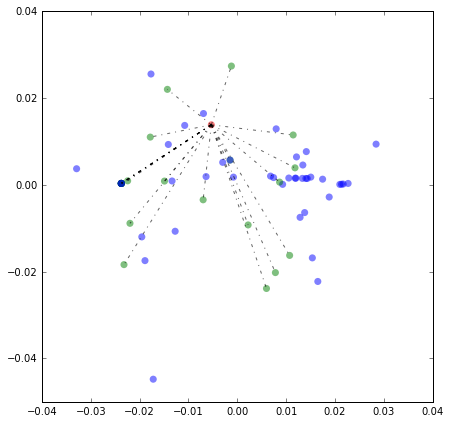

In [134]:
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D
from mpld3 import plugins
import mpld3
from networkx.drawing.nx_agraph import graphviz_layout

shownode = tnodep5
show_mat = shownode['mat'][:,:,4]
alpha_mat = show_mat
alpha_mat = np.where(alpha_mat<0, 0, alpha_mat)
# normalize distance matrix
dist_mat = show_mat
dist_mat = np.where((dist_mat<1e-9) & (dist_mat>0), 1e-9, dist_mat)
dist_mat = np.where((dist_mat<=0), 1e-13, dist_mat)
# make diagonal distance matrix
for i in range(dist_mat.shape[0]):
    for j in range(i,dist_mat.shape[1]):
        dist_mat[i,j] = (dist_mat[i,j] + dist_mat[j,i]) / 2
        #dist_mat[i,j] = dist_mat[i,j] if dist_mat[i,j] > dist_mat[j,i] else dist_mat[j,i]
        dist_mat[j,i] = dist_mat[i,j]
#print(dist_mat)        
max_val = np.max(dist_mat)
#print(max_val) 
dist_mat = np.log(max_val/dist_mat)
#dist_mat = np.where(dist_mat<1e-13, 1e-13, dist_mat)
for i in range(dist_mat.shape[0]):
    dist_mat[i,i] = 0
#dist_mat = max_val/np.where(dist_mat<1e-13, 1e-13, dist_mat)
#dist_mat = np.where(dist_mat<1e-6, 1e-6, dist_mat)
#print(dist_mat)


#pos = pCoordinate(dist_mat)
#print(pos)

#G = nx.from_numpy_matrix(dist_mat) 
#pos=nx.spring_layout(G,dim=2,k=0.3)
#pos=graphviz_layout(G,prog='neato')
#print(pos)

# measuring distance matrix using principal coordinate analysis
noise = np.random.normal(0,1e-9,dist_mat.shape[0]*dist_mat.shape[1])
noise=noise.reshape(dist_mat.shape[0],dist_mat.shape[1])
test_dist = dist_mat + noise
pos = pCoordinate(test_dist)

trans = shownode['trans']
target_node = trans.index(shownode['target'])
colors = np.tile('',len(trans))
parents = []
neighbors = []
target = 0
for i in range(len(trans)):
    tran = trans[i]
    if tran == shownode['target']:
        colors[i]='red'
        target = i
    if tran in shownode['parents']:
        colors[i]='green'
        parents.append(i)
    if tran in shownode['neighbors']:
        colors[i]='blue'
        neighbors.append(i)
        
        
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
#ax = fig.add_subplot(111, projection='3d')

# draw the lines from parents to target
for parent in parents:
    linelabel = ax.plot([pos[target][0],pos[parent][0]],[pos[target][1],pos[parent][1]],'-.',c='black',alpha=0.6)
    #print(dist_mat[parent,target])
    #plugins.connect(fig, plugins.LineLabelTooltip(linelabel[0],dist_mat[parent,target],voffset=10, hoffset=10))

# draw the lines from the neighbors to all parent
for neighbor in neighbors:
    act_neighbor = trans[neighbor]
    # get all the parent
    myParents = edges[act_neighbor]
    for myParent in myParents:
        if myParent in trans:
            pIndex = trans.index(myParent)
            #linelabel = ax.plot([pos[neighbor][0],pos[pIndex][0]],[pos[neighbor][1],pos[pIndex][1]],'-.',c='black',alpha=0.3)
            #print(dist_mat[pIndex,neighbor])
            #plugins.connect(fig, plugins.LineLabelTooltip(linelabel[0],dist_mat[pIndex,neighbor],voffset=10, hoffset=10))

labels = []
x = []
y = []
c = []
for k, p in pos.items():
    #x.append(p[0])
    #y.append(p[1])
    #c.append(colors[k])
    #labels.append(nodeHash[trans[k]])
    scatter = ax.scatter(p[0], p[1], marker='o', c=colors[k], s=50,alpha=0.5, edgecolor='None')
    tooltip = plugins.PointHTMLTooltip(scatter, ['{}, alpha to {}: {}'.format(nodeHash[trans[k]],nodeHash[trans[target_node]],alpha_mat[k,target_node])],
                                       voffset=10,hoffset=10)
    plugins.connect(fig, tooltip)

        
    #ax.scatter(p[0], p[1], p[2], c=colors[k], marker='o')

#scatter = ax.scatter(x,y, marker='o', c=c, s=50,alpha=0.5, edgecolor='None')

    
#lgd = plt.legend(markers, labels, numpoints=1, bbox_to_anchor=(1.17, 0.5))
#plt.tight_layout()
#plt.axis('equal')
#pt.show()
#print(labels)
#tooltip = plugins.PointHTMLTooltip(scatter, labels,
#                                   voffset=10, hoffset=10)
#plugins.connect(fig, tooltip)

#mpld3.display()
mpld3.enable_notebook()


In [780]:
dist_mat
noise = np.random.normal(0,1e-6,dist_mat.shape[0]*dist_mat.shape[1])
noise=noise.reshape(dist_mat.shape[0],dist_mat.shape[1])
test_dist = dist_mat + noise
pcoor = pCoordinate(test_dist)
pcoor

{0: [-0.011437802897090673, 0.00048702233117380001],
 1: [-0.024880928492104732, 0.0004149606535540411],
 2: [-0.004766219622588665, 0.037827133869579782],
 3: [-0.0016471662921177903, 0.016645863346614009],
 4: [-0.0039450462571983405, 0.003355829316756727],
 5: [-0.0055590471688556006, -0.05105168671557879],
 6: [-0.0022942845136364868, -0.059352913027396266],
 7: [-0.0061990804305624364, -0.04452638718662464],
 8: [0.071661946407553634, -0.0043942513476221768],
 9: [-0.024880259151617255, 0.00041493573340168797],
 10: [-0.0079910939831161192, 0.0052102836204938998],
 11: [-0.0091379241294539688, -0.0019013492858305932],
 12: [-0.024880480907436001, 0.00041494510469349753],
 13: [-0.01330479855073524, 0.0064701934730895675],
 14: [-4.1974438476439105e-05, -0.025608971762902562],
 15: [-0.024880761404492625, 0.0004149564183874728],
 16: [-0.024880064478848163, 0.00041492884313203539],
 17: [-0.0058277667632638339, 0.0034908726763638498],
 18: [-0.024880894894961862, 0.0004149626963720

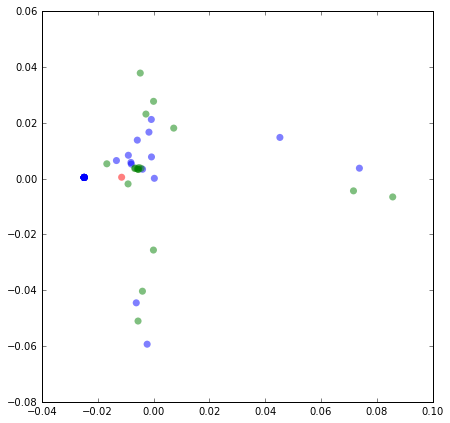

In [781]:
fig = plt.figure(figsize=(7, 7))
#ax = fig.add_subplot(111, projection='3d')
for k, p in pcoor.items():
    plt.scatter(p[0], p[1], marker='o', c=colors[k], s=50,alpha=0.5, edgecolor='None')
    #ax.scatter(p[0], p[1], p[2], c=colors[k], marker='o')

In [151]:
import pandas as pd
# plot accuarcy statistic
baseAcc = pd.read_csv('prediction-child-parents-stat.txt')
improveAcc = pd.read_csv('prediction-child-parents-p-stat.txt')

In [152]:
baseAcc['casMean'] = baseAcc.apply(lambda x: x['TotalCascade']/x['TotalNode'],axis=1)
improveAcc['casMean'] = improveAcc.apply(lambda x: x['TotalCascade']/x['TotalNode'],axis=1)

In [ ]:
# bin by totalCascade
steplen = 500
casSteps = np.arange(0,9500,steplen)
casSteps = np.append(casSteps,9500)
print(casSteps)

baseMeans = []

for i in range(len(casSteps)-1):
    sampleAcc = baseAcc[(baseAcc['TotalCascade']>=casSteps[i])&(baseAcc['TotalCascade']<casSteps[i+1])]
    baseCasMean = sampleAcc['Accuracy'].mean()    
    if sampleAcc.shape[0]>0: 
        baseMeans.append(baseCasMean)
    else:
        baseMeans.append(baseMeans[len(baseMeans)-1])
    
improveMeans = []

for i in range(len(casSteps)-1):
    sampleAcc = improveAcc[(improveAcc['TotalCascade']>=casSteps[i])&(improveAcc['TotalCascade']<casSteps[i+1])]
    improveCasMean = sampleAcc['Accuracy'].mean()
    if sampleAcc.shape[0]>0:
        improveMeans.append(improveCasMean)
    else:
        improveMeans.append(improveMeans[len(improveMeans)-1])

In [ ]:
fig = plt.figure(figsize=(7, 7))
ahaList = (casSteps+(steplen/2)).tolist()

patch_array = []
x1 = plt.plot(ahaList[:len(ahaList)-1], baseMeans, '-',label='Netrate Baseline')
x2 = plt.plot(ahaList[:len(ahaList)-1], improveMeans, '-',label='Netrate Improvement')

plt.plot([0,1000],[0,1.01],color='white',marker='.')
plt.xlabel('Number of Cascades')
plt.ylabel('Accuracy')
plt.title('Accuracy over Number of Cascades Direct Network')
legend = plt.legend(loc='upper right', shadow=True)


In [155]:
# bin by total Nodes
steplen = 30
casSteps = np.arange(0,350,steplen)
casSteps = np.append(casSteps,350)
#print(casSteps)

baseMeans = []

for i in range(len(casSteps)-1):
    sampleAcc = baseAcc[(baseAcc['TotalNode']>=casSteps[i])&(baseAcc['TotalNode']<casSteps[i+1])]
    baseCasMean = sampleAcc['Accuracy'].mean()
    if sampleAcc.shape[0]>0: 
        baseMeans.append(baseCasMean)
    else:
        baseMeans.append(baseMeans[len(baseMeans)-1])
    
improveMeans = []

for i in range(len(casSteps)-1):
    sampleAcc = improveAcc[(improveAcc['TotalNode']>=casSteps[i])&(improveAcc['TotalNode']<casSteps[i+1])]
    improveCasMean = sampleAcc['Accuracy'].mean()
    if sampleAcc.shape[0]>0:
        improveMeans.append(improveCasMean)
    else:
        improveMeans.append(improveMeans[len(improveMeans)-1])

print(improveMeans)

[0.7124651267053839, 0.8840502961022251, 0.9247979961681396, 0.9575912921399784, 0.9913325095607316, 0.994949494949495, 0.9970291146761734, 1.0, 1.0, 1.0, 1.0, 1.0]


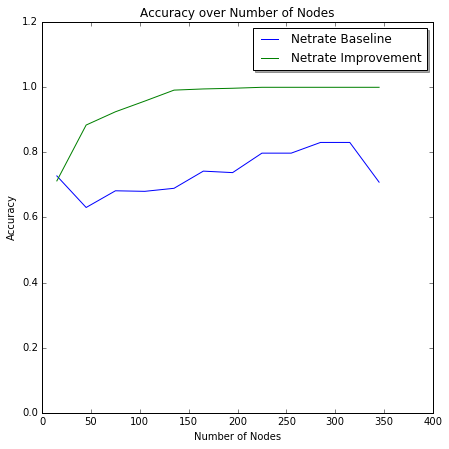

In [156]:
fig = plt.figure(figsize=(7, 7))
ahaList = (casSteps+(steplen/2)).tolist()

plt.plot(ahaList[:len(ahaList)-1], baseMeans, '-',label='Netrate Baseline')
plt.plot(ahaList[:len(ahaList)-1], improveMeans, '-',label='Netrate Improvement')
plt.plot([0,400],[0,1.05],'.',color='white')

plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy over Number of Nodes')
#legend = plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5),shadow=True)
legend = plt.legend(loc='upper right',shadow=True)

In [38]:
baseAcc.TotalNode.max()

349

In [84]:
# bin by total Nodes
steplen = 50
casSteps = np.arange(0,350,steplen)
casSteps = np.append(casSteps,350)
#print(casSteps)

baseMeans = []

for i in range(len(casSteps)-1):
    sampleAcc = baseAcc[(baseAcc['casMean']>=casSteps[i])&(baseAcc['casMean']<casSteps[i+1])]
    baseCasMean = sampleAcc['Accuracy'].mean()
    if sampleAcc.shape[0]>0: 
        baseMeans.append(baseCasMean)
    else:
        baseMeans.append(baseMeans[len(baseMeans)-1])
    
improveMeans = []

for i in range(len(casSteps)-1):
    sampleAcc = improveAcc[(improveAcc['casMean']>=casSteps[i])&(improveAcc['casMean']<casSteps[i+1])]
    improveCasMean = sampleAcc['Accuracy'].mean()
    if sampleAcc.shape[0]>0:
        improveMeans.append(improveCasMean)
    else:
        improveMeans.append(improveMeans[len(improveMeans)-1])

print(improveMeans)

[0.8849597108787282, 0.8400817644602175, 0.8568848592068407, 0.95, 1.0, 0.88, 0.88]


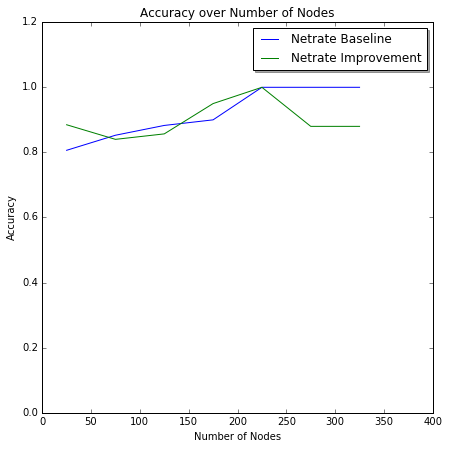

In [85]:
fig = plt.figure(figsize=(7, 7))
ahaList = (casSteps+(steplen/2)).tolist()

plt.plot(ahaList[:len(ahaList)-1], baseMeans, '-',label='Netrate Baseline')
plt.plot(ahaList[:len(ahaList)-1], improveMeans, '-',label='Netrate Improvement')
plt.plot([0,400],[0,1.05],'.',color='white')

plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy over Number of Nodes')
#legend = plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5),shadow=True)
legend = plt.legend(loc='upper right',shadow=True)

In [252]:
import cvxpy as CVX
from collections import defaultdict
import time
import random
import multiprocessing as mp

time_period = 1.0


def solveParallel(exprArr,Ai,constraints,i,proceed,num_nodes,output):
    #print(exprArr)
    resArray = np.zeros(num_nodes)
    try:
        if proceed:
            #print('expr {}: {}'.format(i,exprArr))
            prob = CVX.Problem(CVX.Maximize(exprArr), constraints)
            res = prob.solve(verbose=False,max_iters=500)
            #print(convexNodes[target_node_loc])
            if prob.status in [CVX.OPTIMAL, CVX.OPTIMAL_INACCURATE]:
                resArray = np.asarray(Ai.value).squeeze()
            else:
                resArray[:] = -1
        else:
            resArray[:] = 0
    except BaseException as e:
        print(e)
        resArray[:] = -1
    output.put((i,resArray))

def solveTargetNodeOnlyWithProb(target_node,k_neighbor = 5,neighborlist=[]):
    # we want to infer transmission rate between child
    # and their parents, whose parent giving faster transmission
    # rate than the others therefore we need to use
    # all the cascades that are pass through the parent edge
    # in our cascade observation

    # reconstruct the nodes id for convex optimization problem
    # we will use our nodes of interest following child and
    # and parent relationship while child is the target node
    convexNodes = {}
    convexNodesArr = []
    convexNodes[target_node] = 0
    convexNodesArr.append(target_node)
    convexNodesCount = 1

    # construct the cascade for following 
    #observationCascadesId = nodeCascades[target_node].copy()
    observationCascadesId = copy.copy(nodeCascades[target_node])

    #print(edges[str(target_node)])

    if target_node not in edges.keys():
        # target node not in the edges
        return -1

    # prepare neighbor derived from    
    derivedFrom = {}
    # check neighborhood cascade
    neighborArr = []
    parentCascades = []
    for parent in edges[target_node]:
        #if parent in nodeCascades:
        #    [observationCascadesId.append(x) for x in nodeCascades[parent]]
        # add the convex nodes
        convexNodes[parent] = convexNodesCount
        convexNodesArr.append(parent)
        convexNodesCount+=1
        if parent in nodeCascades:
            [parentCascades.append(x) for x in  nodeCascades[parent]]

    if len(neighborlist) == 0:
        for parent in edges[target_node]:
            # add 5 random neighbor from the parents
            nFollowers = len(followes[parent])
            k = k_neighbor
            k = k if nFollowers > k else nFollowers
            neighbors = random.sample(range(nFollowers),k)        
            #print(followes[parent])
            #print(neighbors)

            for neighbor in neighbors:
                myneighbor = followes[parent][neighbor]
                #print(myneighbor)
                if myneighbor not in convexNodes:
                    if myneighbor in nodeCascades:
                        # [observationCascadesId.append(x) for x in nodeCascades[myneighbor]]
                        # check intersection with parent cascades
                        convexNodes[myneighbor] = convexNodesCount
                        convexNodesArr.append(myneighbor)
                        neighborArr.append(myneighbor)
                        convexNodesCount+=1

                        for x in nodeCascades[myneighbor]:
                            if x in parentCascades:
                                observationCascadesId.append(x)                        
                    else:
                        print('neighbor {} not found in cascade'.format(myneighbor))
    else:
        for myneighbor in neighborlist:
            #print(myneighbor)
            if myneighbor not in convexNodes:
                if myneighbor in nodeCascades:
                    # [observationCascadesId.append(x) for x in nodeCascades[myneighbor]]
                    # check intersection with parent cascades
                    convexNodes[myneighbor] = convexNodesCount
                    convexNodesArr.append(myneighbor)
                    neighborArr.append(myneighbor)
                    convexNodesCount+=1

                    for x in nodeCascades[myneighbor]:
                        if x in parentCascades:
                            observationCascadesId.append(x)                        
                else:
                    print('neighbor {} not found in cascade'.format(myneighbor))


    #print(convexNodes)
    #time.sleep(1)
    
    # reconstruct the observation cascades for this node and their neighbor    
    observationCascades = {}
    for casid in observationCascadesId:
        if casid not in observationCascades:
            observationCascades[casid] = cascades[casid]
            # add neighbor (child) of parent from same cascade
    
    #print(len(observationCascades.keys()))
    #time.sleep(1)

    num_nodes = len(convexNodesArr)

    # prepare the observation matrix
    A = np.zeros((num_nodes, 15), dtype=float)

    for num_node in [convexNodes[target_node]]:
        # This is one column of the alpha matrix
        #Ai = [CVX.Variable(num_nodes, name='A[:,{}]'.format(convexNodes[target_node])) for i in range(15)]
        Ai = CVX.Variable(num_nodes, name='A[:,{}]'.format(convexNodes[target_node])) 
        constraints=[]
        # define constraints
        for j in range(num_nodes):
            if j == num_node:
                constraints.append(Ai[j] == 0)
            else:
                constraints.append(Ai[j] >= 0)
        """
        for i in range(15):
            consChild = []
            for j in range(num_nodes):
                if j == num_node:
                    consChild.append(Ai[i][j] == 0)
                else:
                    consChild.append(Ai[i][j] >= 0)
                constraints.append(consChild)
        """
            
        print('{} of {}'.format(num_node+1,num_nodes))
        target_node_loc = convexNodesArr[num_node]
        bad_infection = 0
        expr = 0
        proceed = False
        
        # prepare expression array
        exprArr = [0 for i in range(15)]
        
        #for c_idx, c in observationCascades.items():
        #for nodecas in nodeCascades[target_node]:
        #for nodecas in observationCascades:
        for c_idx, citem in observationCascades.items():
            # normalize probability
            cprob = np.array(citem['probs'])
            cprob = cprob/cprob.sum()
            c = citem['cas']
        
            #myCount+=1

            infection_time_arr = [x[0] for x in c if x[1] == target_node_loc]
            #print('infection time: {}'.format(infection_time_arr))
            #time.sleep(1)

            #print('cascade: {}'.format(c))
            #print('total cascade: {}'.format(len(c)))
            assert len(infection_time_arr) <= 1
            
            proceedLog = False

            # computing the survival function of
            # the node i given cascade from j
            # this is unlikely to happen except if we are interested in
            # relation with other cascades on the edges
            if len(infection_time_arr) == 0:
                # Node 'i' was not infected in this cascade

                for j in range(len(c)):
                    # check if the cascade transmission is in our observation nodes or not
                    if c[j][1] in convexNodes.keys():
                        #print('alpha_ji surv: {}'.format(alpha_ji))
                        t_j = c[j][0]
                        T = time_period
                        #print('log sur1: {}'.format(logSurvival(T, t_j, alpha_ji)))
                        alpha_ji = Ai[convexNodes[c[j][1]]]
                        for i in range(len(cprob)):                        
                            #alpha_ji = Ai[i][convexNodes[c[j][1]]]
                            exprArr[i] += logSurvival(T, t_j, alpha_ji * cprob[i])
                            #exprArr[i] += logSurvival(T, t_j, alpha_ji)
                        #print('log expr: {}\n'.format(expr))
                        #proceed=True

                # Instead of making so many parameter for uninteresting
                # cascade better to add counter for bad_infection
                # and multiply it with the survival function
                # in the end. Therefore we can save memory for
                # making a convex function

                """
                # because we are interested in parent and child relation only
                # then the logsurvival is the maximum ammount of the observation time
                T = time_period
                alpha_ji = Ai[target_node]
                expr+=logSurvival(T,0,alpha_ji)
                """

                # bad_infection+=1
            else:
                # Node 'i' was infected in this cascade
                infection_time = infection_time_arr[0]
                t_i = infection_time

                if c[0][0] != infection_time:
                    # build the logSurvival and hazard function for
                    # the infection
                    # as a result this function will build an expression
                    # that will be solved by convex problem            
                    #log_sum = 0
                    log_sum = [0 for x in range(15)]

                    # check if the infection from the observation nodes
                    # for child and parent relation
                    for j in range(len(c)):
                        if c[j][1] in convexNodes.keys():
                            t_j = c[j][0]
                            #print('alpha_ji haz: {}'.format(alpha_ji))
                            alpha_ji = Ai[convexNodes[c[j][1]]]
                            if t_j < t_i:
                                for i in range(len(cprob)):                                
                                    #alpha_ji = Ai[i][convexNodes[c[j][1]]]
                                    exprArr[i]+=logSurvival(t_i,t_j,alpha_ji * cprob[i])
                                    #exprArr[i]+=logSurvival(t_i,t_j,alpha_ji)
                                    #print('log sur2: {}'.format(logSurvival(t_i,t_j,alpha_ji)))
                                    log_sum[i]+=hazard(t_i,t_j,alpha_ji * cprob[i])
                                    #print('from cas: {}'.format(log_sum[i]))
                                    #time.sleep(3)
                                proceed=True
                                proceedLog=True
                                #pass
                            #print('expr: {}'.format(expr))
                            #time.sleep(1)
                    
                    if proceedLog:
                        for i in range(len(cprob)):
                            #print('from expr: {}'.format(log_sum[i]))
                            exprArr[i] += CVX.log(log_sum[i])
                            #print(exprArr[i])
                            #time.sleep(1)
             
                    #print('expr: {}'.format(expr))
                    #time.sleep(1)

                    # for parent child relation only
                    """
                    t_j = 0
                    alpha_ji = Ai[target_node]
                    expr+=logSurvival(t_i,0,alpha_ji)
                    log_sum+=hazard(t_i,0,alpha_ji)
                    expr += CVX.log(log_sum)
                    """

        # calculate bad infection for parent and child relation
        """
        T = time_period
        alpha_ji = Ai[target_node]                       
        expr += bad_infection * logSurvival(T,0,alpha_ji)
        """
        #print('expr: {}'.format(expr))
        #print(A)
        #time.sleep(2)
        tempA = np.zeros(num_nodes,dtype=float)
        Aarray = np.zeros((num_nodes,len(cprob)))
                    
        output = mp.Queue()

        argArr = []
        for i in range(15):
            argArr.append((exprArr[i],Ai,constraints,i))

        # Setup a list of processes that we want to run
        processes = [mp.Process(target=solveParallel, args=(x[0], x[1], x[2],x[3],proceed,num_nodes,output)) for x in argArr]

        # Run processes
        for p in processes:
            p.start()

        # Exit the completed processes
        for p in processes:
            p.join()

        # Get process results from the output queue
        results = [output.get() for p in processes]

        results.sort()
        results = [r[1] for r in results]
        Aarray = np.array(results)
        #print(Aarray)
        #print(Aarray.shape)        
        
        """
        for i in range(len(cprob)):
            try:
                if proceed:
                #print(exprArr[i])
                #time.sleep(10)
                    prob = CVX.Problem(CVX.Maximize(exprArr[i]), constraints)
                    res = prob.solve(verbose=False,max_iters=500)
                    #print(convexNodes[target_node_loc])
                    if prob.status in [CVX.OPTIMAL, CVX.OPTIMAL_INACCURATE]:
                        Aarray[:,i] = np.asarray(Ai[i].value).squeeze()
                    else:
                        Aarray[:,i] = -1
                else:
                    Aarray[:,i] = 0
            except BaseException as e:
                print(e)
                Aarray[:,i] = -1
        """
        #print(Aarray)
        A[:] = Aarray.T
#        print(A[:,num_node])
    return({'mat': A,'target':target_node, 'parents': edges[target_node],'neighbors': neighborArr,'trans':convexNodesArr})

In [274]:
tnodeo5= solveTargetNodeOnlyWithProb(268,2)

neighbor 42169 not found in cascade
neighbor 44521 not found in cascade
neighbor 40151 not found in cascade
neighbor 32586 not found in cascade
neighbor 6545 not found in cascade
neighbor 38714 not found in cascade
neighbor 19776 not found in cascade
neighbor 18004 not found in cascade
neighbor 3052 not found in cascade
neighbor 6266 not found in cascade
1 of 58
Combined backtracking failed 89 0 0 1 sigma 0.0513991
Combined backtracking failed 90 0 0 0 sigma 0.285428
Combined backtracking failed 90 0 0 0 sigma 0.135229
Combined backtracking failed 90 0 0 0 sigma 0.660793
Combined backtracking failed 87 0 2 1 sigma 0.32155
Combined backtracking failed 90 0 0 0 sigma 0.0499031
Combined backtracking failed 90 0 0 0 sigma 0.0534095
Combined backtracking failed 89 0 1 0 sigma 0.276906
Combined backtracking failed 89 0 0 1 sigma 0.0927132
Combined backtracking failed 90 0 0 0 sigma 0.587189
Combined backtracking failed 90 0 0 0 sigma 0.660064
Combined backtracking failed 89 0 0 1 sigma 0.075

In [275]:
tnodeo5['mat']

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  8.30315368e+01,   5.90925746e+01,   4.79496965e+01,
          9.65599373e+01,   5.58356153e+02,   2.55671390e+02,
          9.90595758e+02,   4.35943312e+01,   3.53176582e+02,
          4.35293247e+01,   3.57408507e+00,   2.56115735e+02,
          8.90299391e+02,   6.04736118e+01,   3.10577112e+02],
       [  1.75544591e+00,   3.92323197e+01,   4.31383817e+00,
          1.72343908e+00,   1.73074354e+00,   1.55292806e+01,
          8.96120894e+01,   2.27524724e+00,   3.46498599e+01,
          2.56532941e+00,   2.51924599e+00,   1.40063660e+00,
          4.76370216e+00,   7.80083060e+00,   1.63945465e+00],
       [  8.30315368e+01,   5.90925746e+01,   4.79496965e+01,
     

[[  1.00000000e-13   8.30315368e+01   1.75544591e+00 ...,   9.91137516e-06
    4.57229390e-06   1.17134036e-05]
 [  8.30315368e+01   1.02317244e+00   1.02317244e+00 ...,   1.02317244e+00
    1.02317244e+00   1.02317244e+00]
 [  1.75544591e+00   1.02317244e+00   1.02317244e+00 ...,   1.02317244e+00
    1.02317244e+00   1.02317244e+00]
 ..., 
 [  9.91137516e-06   1.02317244e+00   1.02317244e+00 ...,   1.02317244e+00
    1.02317244e+00   1.02317244e+00]
 [  4.57229390e-06   1.02317244e+00   1.02317244e+00 ...,   1.02317244e+00
    1.02317244e+00   1.02317244e+00]
 [  1.17134036e-05   1.02317244e+00   1.02317244e+00 ...,   1.02317244e+00
    1.02317244e+00   1.02317244e+00]]
[[  0.           5.83868297   9.69518057 ...,  21.77973092  22.553399
   21.61268024]
 [  5.83868297   0.          10.23499544 ...,  10.23499544  10.23499544
   10.23499544]
 [  9.69518057  10.23499544   0.         ...,  10.23499544  10.23499544
   10.23499544]
 ..., 
 [ 21.77973092  10.23499544  10.23499544 ...,   0. 

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


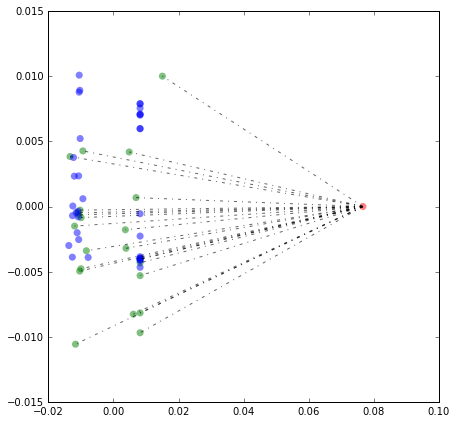

In [276]:
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D
from mpld3 import plugins
import mpld3
from networkx.drawing.nx_agraph import graphviz_layout

shownode = tnodeo5
show_mat = shownode['mat'][:,0]
alpha_mat = show_mat
alpha_mat = np.where(alpha_mat<0, 0, alpha_mat)
# normalize distance matrix
dist_matd = show_mat
dist_matd = np.where((dist_matd<1e-9) & (dist_matd>0), 1e-9, dist_matd)
dist_matd = np.where((dist_matd<=0), 1e-13, dist_matd)

dist_mat = np.zeros((show_mat.shape[0],show_mat.shape[0]))
# make diagonal distance matrix
transMat = shownode['trans']
tarMat = shownode['target']

dist_mat[:,transMat.index(tarMat)] = dist_matd
for i in range(dist_matd.shape[0]):
    dist_mat[transMat.index(tarMat),i] = dist_matd[i]

# add small value
#dist_mat = np.where((dist_mat<=0), 1e-13, dist_mat)

# add non significant noise to distance matrix for variational rotation
dist_mat = np.where((dist_mat<=0), np.abs(np.random.normal(0,1)), dist_mat)

print(dist_mat)

for i in range(dist_mat.shape[0]):
    for j in range(i,dist_mat.shape[1]):
        dist_mat[i,j] = (dist_mat[i,j] + dist_mat[j,i]) / 2
        #dist_mat[i,j] = dist_mat[i,j] if dist_mat[i,j] > dist_mat[j,i] else dist_mat[j,i]
        dist_mat[j,i] = dist_mat[i,j]
#print(dist_mat)        
max_val = np.max(dist_mat)
#print(max_val) 
dist_mat = np.log(max_val/dist_mat)
#dist_mat = np.where(dist_mat<1e-13, 1e-13, dist_mat)
for i in range(dist_mat.shape[0]):
    dist_mat[i,i] = 0
#dist_mat = max_val/np.where(dist_mat<1e-13, 1e-13, dist_mat)
#dist_mat = np.where(dist_mat<1e-6, 1e-6, dist_mat)
#print(dist_mat)

print(dist_mat)

#pos = pCoordinate(dist_mat)
#print(pos)

#G = nx.from_numpy_matrix(dist_mat) 
#pos=nx.spring_layout(G,dim=2)
#pos=graphviz_layout(G,prog='neato')
#print(pos)

# measuring distance matrix using principal coordinate analysis
"""
noise = np.random.normal(0,1e-9,dist_mat.shape[0]*dist_mat.shape[1])
noise=noise.reshape(dist_mat.shape[0],dist_mat.shape[1])
test_dist = dist_mat + noise
pos = pCoordinate(test_dist)
"""
pos = pCoordinate(dist_mat)

trans = shownode['trans']
target_node = trans.index(shownode['target'])
colors = np.tile('',len(trans))
parents = []
neighbors = []
target = 0
for i in range(len(trans)):
    tran = trans[i]
    if tran == shownode['target']:
        colors[i]='red'
        target = i
    if tran in shownode['parents']:
        colors[i]='green'
        parents.append(i)
    if tran in shownode['neighbors']:
        colors[i]='blue'
        neighbors.append(i)
        
        
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
#ax = fig.add_subplot(111, projection='3d')

# draw the lines from parents to target
for parent in parents:
    linelabel = ax.plot([pos[target][0],pos[parent][0]],[pos[target][1],pos[parent][1]],'-.',c='black',alpha=0.6)
    #print(dist_mat[parent,target])
    #plugins.connect(fig, plugins.LineLabelTooltip(linelabel[0],dist_mat[parent,target],voffset=10, hoffset=10))

# draw the lines from the neighbors to all parent
for neighbor in neighbors:
    act_neighbor = trans[neighbor]
    # get all the parent
    myParents = edges[act_neighbor]
    for myParent in myParents:
        if myParent in trans:
            pIndex = trans.index(myParent)
            #linelabel = ax.plot([pos[neighbor][0],pos[pIndex][0]],[pos[neighbor][1],pos[pIndex][1]],'-.',c='black',alpha=0.3)
            #print(dist_mat[pIndex,neighbor])
            #plugins.connect(fig, plugins.LineLabelTooltip(linelabel[0],dist_mat[pIndex,neighbor],voffset=10, hoffset=10))

labels = []
x = []
y = []
c = []
for k, p in pos.items():
    #x.append(p[0])
    #y.append(p[1])
    #c.append(colors[k])
    #labels.append(nodeHash[trans[k]])
    scatter = ax.scatter(p[0], p[1], marker='o', c=colors[k], s=50,alpha=0.5, edgecolor='None')
    tooltip = plugins.PointHTMLTooltip(scatter, ['{}, alpha to {}: {}'.format(nodeHash[trans[k]],nodeHash[trans[target_node]],alpha_mat[k])],
                                       voffset=10,hoffset=10)
    plugins.connect(fig, tooltip)

        
    #ax.scatter(p[0], p[1], p[2], c=colors[k], marker='o')

#scatter = ax.scatter(x,y, marker='o', c=c, s=50,alpha=0.5, edgecolor='None')

    
#lgd = plt.legend(markers, labels, numpoints=1, bbox_to_anchor=(1.17, 0.5))
#plt.tight_layout()
#plt.axis('equal')
#pt.show()
#print(labels)
#tooltip = plugins.PointHTMLTooltip(scatter, labels,
#                                   voffset=10, hoffset=10)
#plugins.connect(fig, tooltip)

#mpld3.display()
mpld3.enable_notebook()


In [140]:
dist_mat[3]

array([ 9.54726838,  9.9230511 ,  9.9230511 ,  0.        ,  9.9230511 ,
        9.9230511 ,  9.9230511 ,  9.9230511 ,  9.9230511 ,  9.9230511 ,
        9.9230511 ,  9.9230511 ,  9.9230511 ,  9.9230511 ,  9.9230511 ,
        9.9230511 ,  9.9230511 ,  9.9230511 ,  9.9230511 ,  9.9230511 ,
        9.9230511 ,  9.9230511 ,  9.9230511 ,  9.9230511 ,  9.9230511 ,
        9.9230511 ,  9.9230511 ,  9.9230511 ,  9.9230511 ,  9.9230511 ,
        9.9230511 ,  9.9230511 ,  9.9230511 ,  9.9230511 ,  9.9230511 ,
        9.9230511 ,  9.9230511 ,  9.9230511 ,  9.9230511 ,  9.9230511 ,
        9.9230511 ,  9.9230511 ,  9.9230511 ,  9.9230511 ,  9.9230511 ,
        9.9230511 ,  9.9230511 ,  9.9230511 ,  9.9230511 ,  9.9230511 ,
        9.9230511 ,  9.9230511 ,  9.9230511 ,  9.9230511 ,  9.9230511 ,
        9.9230511 ,  9.9230511 ,  9.9230511 ,  9.9230511 ,  9.9230511 ,
        9.9230511 ,  9.9230511 ,  9.9230511 ,  9.9230511 ,  9.9230511 ,
        9.9230511 ,  9.9230511 ,  9.9230511 ])

In [181]:
# get sample node list, 10 for each node
nodelist = baseAcc['TotalNode'].unique()
nodelist = np.sort(nodelist)
sampleArr = []
for totalnode in nodelist:
    total_sample=10
    targetnodes = baseAcc[baseAcc['TotalNode']==totalnode]['TargetNode']
    total_sample=total_sample if targetnodes.shape[0] > total_sample else targetnodes.shape[0]
    sample = targetnodes.iloc[random.sample(range(targetnodes.shape[0]),total_sample)].values
    print(sample.tolist())
    with open('sample-node.txt','a') as sampleFile:
        sampleFile.write('{}\n'.format(json.dumps({'totalnode':int(totalnode),'sample':sample.tolist()})))
    sampleArr.append(sample)

[4378, 11375, 20024, 38902, 20691, 12081, 2580, 22163, 21113, 5454]
[24798, 24086, 39009, 36458, 38974, 25437, 35366, 27951, 9906, 24786]
[11209, 15143, 15789, 13892, 21124, 9636, 451, 42229, 23882, 9523]
[447, 27441, 28975, 40167, 4390, 38311, 24815, 5306, 12136, 23889]
[28440, 32251, 30671, 10564, 31369, 3228, 10386, 1470, 6676, 23650]
[27017, 43673, 12695, 18605, 43141, 6498, 1615, 30064, 7799, 28338]
[35976, 36714, 25370, 9310, 27535, 18906, 16554, 25626, 27401, 27381]
[8308, 26133, 22618, 42118, 29801, 16897, 24744, 43754, 15952, 44080]
[13860, 5047, 29077, 28009, 28821, 41706, 27913, 14965, 38602, 31534]
[455, 43985, 19182, 24261, 8117, 10648, 24869, 3825, 3412, 23507]
[42910, 24031, 4605, 6094, 4887, 36421, 23877, 12091, 29219, 29977]
[39623, 1758, 42154, 35443, 21345, 16261, 25587, 38610, 16412, 26362]
[11211, 39638, 13588, 11178, 24778, 13819, 13049, 1273, 41851, 10104]
[9513, 18962, 14716, 13311, 20818, 17914, 29996, 12974, 2941, 16925]
[7204, 3116, 32953, 7580, 16906, 1579, 

In [172]:
sampleArr

[array([43152, 13885, 44693, 27913, 40005, 11029,  3466, 38507, 18756,  6353]),
 array([34797, 17330, 22835, 29350, 32185, 11970, 27416, 32113, 27718, 35894]),
 array([39760, 17755, 18324, 10147,  7691, 42939, 30188, 31395, 21267, 25338]),
 array([22755, 31737, 37663, 26826, 28534, 37892, 26219, 10605, 33782, 43487]),
 array([13585,  2063,  7481, 40117,   562, 33753, 18493, 20630, 36114, 16631]),
 array([43952, 39200,  1222, 11956, 28643, 40163, 31240, 18336, 11883, 28994]),
 array([ 8924, 13977, 22371, 38697, 41115,  3902,  4012, 30745, 33870,  5375]),
 array([42700, 37499, 40531,  1730, 16400,  9744,  3761, 31063, 44058, 36691]),
 array([38459, 32861, 25587, 27212,  3257,   580,  1630, 24833, 21597, 40219]),
 array([40595, 20388, 31501, 40247, 18552, 22385,  1579,  8245, 38458,  5974]),
 array([ 5672, 34424, 17914,   515, 44022,  9513,  4789,  7689, 24700, 24364]),
 array([11904, 19827,  3040, 11240,   400,  5694,  8087, 35952,  3623, 37832]),
 array([35325,    69, 13704, 22591, 3188

In [269]:
testneigh = solveTargetNodeOnlyWithProb(33670,k_neighbor=1)

neighbor 27731 not found in cascade
neighbor 5793 not found in cascade
neighbor 18302 not found in cascade
neighbor 946 not found in cascade
neighbor 17242 not found in cascade
neighbor 25809 not found in cascade
neighbor 8846 not found in cascade
neighbor 31629 not found in cascade
neighbor 44520 not found in cascade
neighbor 1184 not found in cascade
neighbor 26655 not found in cascade
neighbor 13683 not found in cascade
neighbor 33424 not found in cascade
neighbor 42830 not found in cascade
neighbor 27414 not found in cascade
neighbor 6395 not found in cascade
neighbor 33743 not found in cascade
neighbor 37774 not found in cascade
neighbor 9639 not found in cascade
neighbor 14942 not found in cascade
neighbor 11193 not found in cascade
neighbor 29932 not found in cascade
neighbor 35217 not found in cascade
neighbor 22226 not found in cascade
neighbor 29123 not found in cascade
neighbor 45056 not found in cascade
neighbor 29932 not found in cascade
neighbor 15433 not found in cascade

Process Process-3682:


KeyboardInterrupt: 

Traceback (most recent call last):
  File "/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    util._exit_function()
  File "/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/multiprocessing/util.py", line 314, in _exit_function
    _run_finalizers()
  File "/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/multiprocessing/util.py", line 254, in _run_finalizers
    finalizer()
  File "/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/multiprocessing/util.py", line 186, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/multiprocessing/queues.py", line 198, in _finalize_join
    thread.join()
  File "/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/threading.py", line 1054, in join
    self._wait_for_tstate_lock()
  File "/Volumes/HD-500GB/Us

In [268]:
testneigh['mat'][1,:]

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1.])